<a class="anchor" id="1st-bullet">
<font color = '#2f4bd6ff'>

# **HR Attrition**

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats


############################################ FEATURE SELECTION ############################################
!pip install scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method
from sklearn.linear_model import LogisticRegressionCV

import warnings
warnings.filterwarnings('ignore')

from datetime import date
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

############################################## PREPROCESSING ##############################################
from sklearn.preprocessing import MinMaxScaler

################################################# MODELS ##################################################
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.cluster import KMeans

################################################# METRICS #################################################
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score


################################### MODEL SELECTION & OPTIMIZATION ########################################
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

######################################### DECISION TREES PLOTS ############################################
# in anaconda prompt: conda install python-graphviz
!pip install pydotplus
!pip install graphviz pydotplus
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz
from sklearn import tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import brier_score_loss
from sklearn.metrics import silhouette_score

<a class="anchor" id="1st-bullet">
<font color = '#2f4bd6ff'>
    
# **1. EDA - Exploratory Data Analysis** </font></a>


<a class="anchor" id="2nd-bullet">
<font color = '#2f4bd6ff'>
    
## **1.1. Data Upload** </font></a>


In section 1.1 we import the database "HR_Attrition_Dataset.csv".

In [2]:
df = pd.read_csv("HR_Attrition_Dataset.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **1.2 Initial characterization of the database** </font></a>

The database has a size of 1,470 rows and 35 columns, with no duplicate records identified. Regarding the types of variables, it was found that the dataset is composed of 35 variables, of which 9 are categorical and 26 are numerical.

The target variable is “Attrition”.

In [3]:
# Describe dataset structure
df.shape

(1470, 35)

In [4]:
# Verify the existance of null-values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null-values

In [5]:
# Verify the existance of duplicate values
df[df.duplicated()]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

There are no duplicate values

In [6]:
# Check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
#Set Index
df.set_index(keys=df['EmployeeNumber'],inplace=True)

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **1.3  Basic exploration of the Data Frame and initial preprocessing** </font></a>

An initial exploration of the training data was carried out with the aim of obtaining an overall view of the dataset’s contents and identifying any potential preprocessing needs.
This step was essential to understand the data structure and to detect inconsistencies, missing values, or duplicates that could compromise the quality of the subsequent analysis.

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
#Analyze the main statistics of the numerical variables
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [10]:
#Analyze the main statistics of the categorical variables
df.describe(include=['object']).T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054

'EmployeeCount' is always = 1 (std = 0) - remove

'StandardHours' is always = 80 (std = 0) - remove

'Over18' is always =1 - remove

In [11]:
# Drop Columns
cols_to_drop = ['EmployeeCount', 'StandardHours', 'Over18']
df.drop(columns=cols_to_drop, inplace=True)

df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [12]:
# Numerical Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
# Categorical Variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [14]:
# Observe Unique Values
# List of columns
columns = df.columns.tolist()

# Unique Values
for col in columns:
    unique_vals = df[col].unique()
    print(f"{col} → {unique_vals}")


Age → [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition → ['Yes' 'No']
BusinessTravel → ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate → [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  

<a class="anchor" id="1st-bullet">
<font color = '#2f4bd6ff'>
    
# **2. Data Splitting: Train / Validation / Test sets** </font></a>

In [15]:

# Copy the cleaned dataset
data_model = df.copy()

# Separate features and target
X = data_model.drop(columns='Attrition')
y = data_model['Attrition'].copy()

# --- Step 1: Split Train (70%) and Temp (30%) ---
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,        # 30% for validation + test
    random_state=42,
    stratify=y            # maintain class proportions
)

# --- Step 2: Split Temp into Validation (15%) and Test (15%) ---
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,        # 50% of 30% → 15% of total
    random_state=42,
    stratify=y_temp
)

# --- Summary ---
print(f"Training size: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Validation size: {len(X_val)} ({len(X_val)/len(df)*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")

# --- Check class distribution ---
print("\nTraining Distribution:")
print(y_train.value_counts(normalize=True) * 100)

print("\nValidation Distribution:")
print(y_val.value_counts(normalize=True) * 100)

print("\nTest Distribution:")
print(y_test.value_counts(normalize=True) * 100)



Training size: 1029 (70.0%)
Validation size: 220 (15.0%)
Test size: 221 (15.0%)

Training Distribution:
Attrition
No     83.867833
Yes    16.132167
Name: proportion, dtype: float64

Validation Distribution:
Attrition
No     84.090909
Yes    15.909091
Name: proportion, dtype: float64

Test Distribution:
Attrition
No     83.710407
Yes    16.289593
Name: proportion, dtype: float64


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **3. Visual Exploration** </font></a>

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **3.1 Target Variable** </font></a>

In [16]:
#Target Variable Distribution (Training Set)
# Count of each class
count = y_train.value_counts().sort_index()

# Percentage of each class
percent = y_train.value_counts(normalize=True).sort_index() * 100
percent = percent.map('{:,.2f} %'.format)

# Combine count and percentage in a dataframe
df_target = pd.concat([count, percent], axis=1)
df_target.columns = ['Nr of Employees', '%']
display(df_target)




Nr of Employees        %
Attrition                          
No                     863  83.87 %
Yes                    166  16.13 %

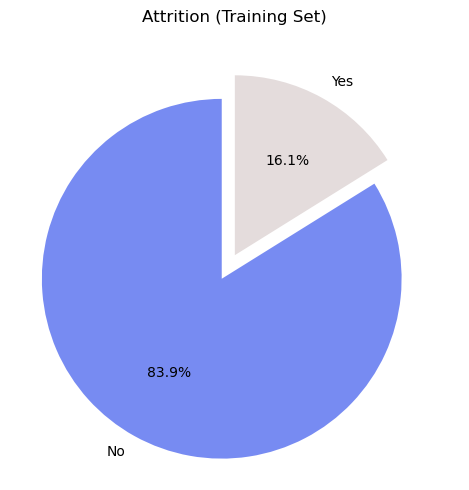

In [17]:

# Pie Chart

plt.figure(figsize=(5,5))
count.plot(
    kind='pie',
    labels=['No', 'Yes'],
    explode=(0.15, 0),
    startangle=90,
    autopct='%1.1f%%',
    colors=["#778bf2ff", "#e4dcdcff"]
)
plt.title("Attrition (Training Set)")
plt.ylabel('')
plt.tight_layout()
plt.show()


Employee Attrition:

    83.87% of employees stayed with the company.

    16.13% of employees left the company.

The dataset is imbalanced toward those who stayed.

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **3.2 Categorical Variables** </font></a>

In [18]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(col)


BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
OverTime


In [19]:
def analyze_categorical_train(X_train, y_train, feature):

    # Combine X_train and y_train
    df = X_train.copy()
    df['Target'] = y_train

    # --- Counts and percentages ---
    counts = df[feature].value_counts().sort_index()
    pct = df[feature].value_counts(normalize=True).sort_index() * 100
    pct = pct.map("{:,.2f}%".format)
    summary = pd.concat([counts, pct], axis=1)
    summary.columns = ['Count', '%']
    display(summary)

   # --- Count bar plot ---
    plt.figure(figsize=(8,5))
    sns.countplot(x=feature, data=df, palette="Blues", order=counts.index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # --- Target rate (temporary numeric conversion) ---
    df['_target_numeric'] = df['Target'].map({'No': 0, 'Yes': 1})
    rate = df.groupby(feature)['_target_numeric'].mean().reset_index()

    plt.figure(figsize=(8,5))
    sns.barplot(x=feature, y='_target_numeric', data=rate, palette="Blues", order=counts.index)
    plt.title(f'Target Rate by {feature}')
    plt.ylabel("Target Rate (0-1)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Count       %
Gender               
Female    419  40.72%
Male      610  59.28%

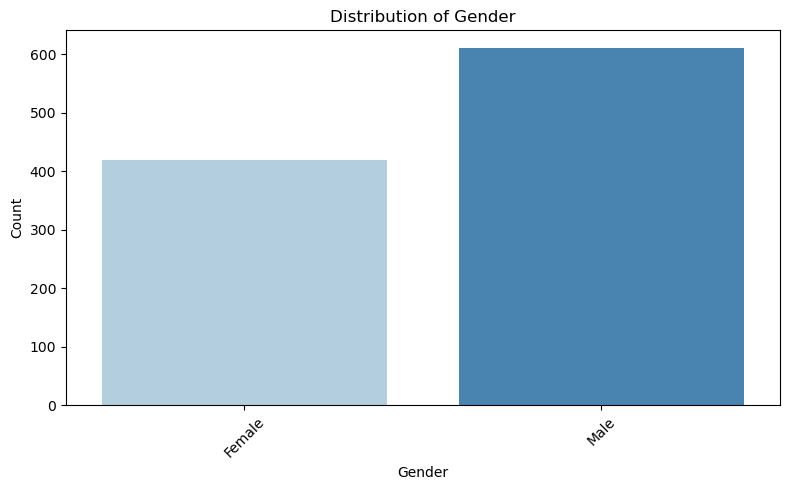

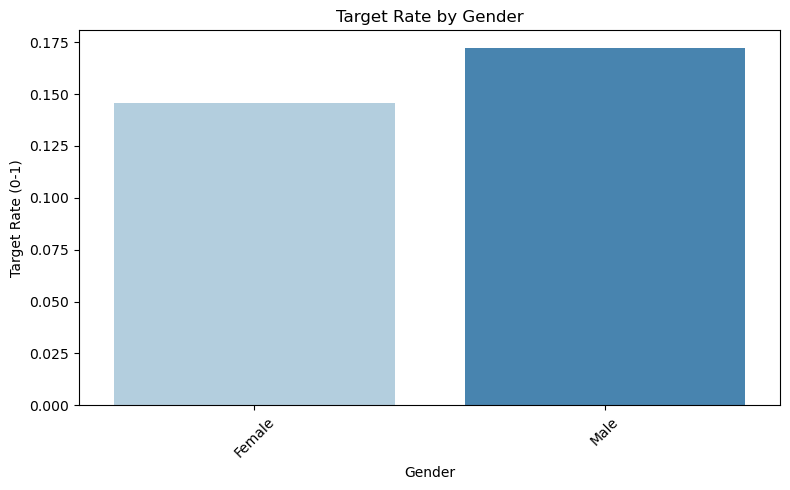

In [20]:
# Gender
analyze_categorical_train(X_train, y_train, 'Gender')

Count       %
MaritalStatus               
Divorced         228  22.16%
Married          477  46.36%
Single           324  31.49%

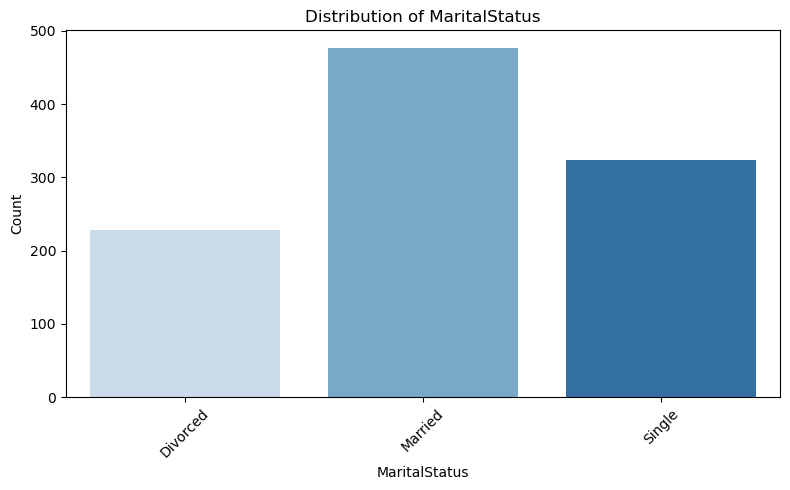

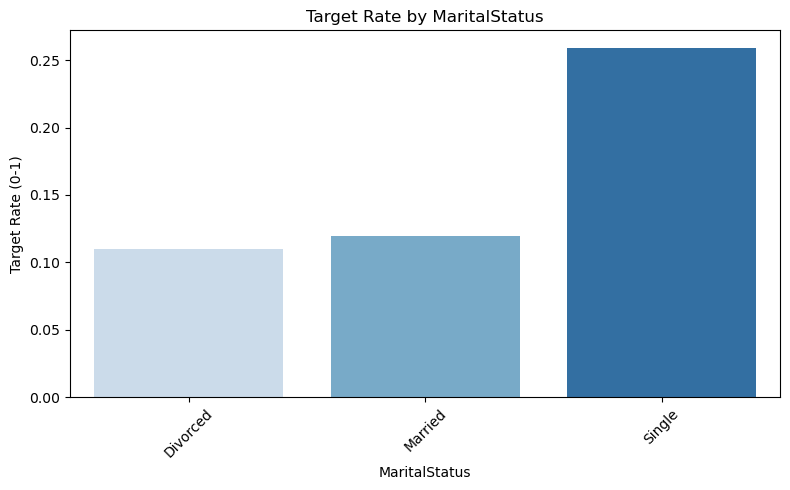

In [21]:
# MaritalStatus
analyze_categorical_train(X_train, y_train, 'MaritalStatus')

Count       %
EducationField                 
Human Resources      18   1.75%
Life Sciences       419  40.72%
Marketing           116  11.27%
Medical             321  31.20%
Other                49   4.76%
Technical Degree    106  10.30%

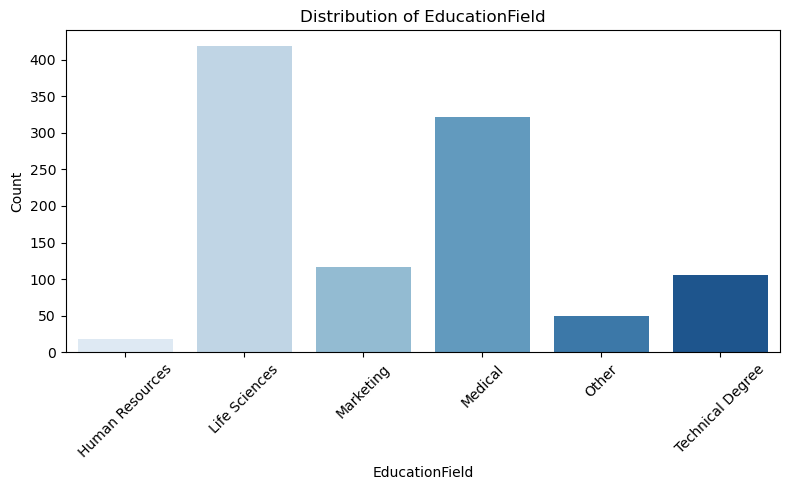

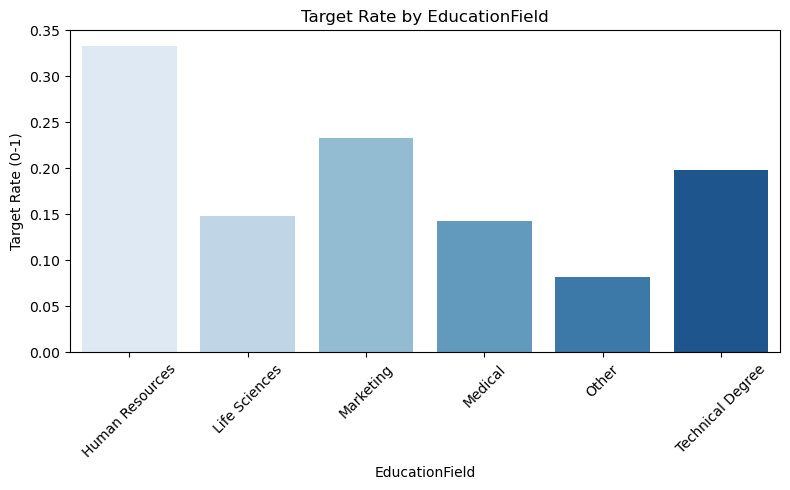

In [22]:
# EducationField
analyze_categorical_train(X_train, y_train, 'EducationField')

Count       %
Department                           
Human Resources            44   4.28%
Research & Development    668  64.92%
Sales                     317  30.81%

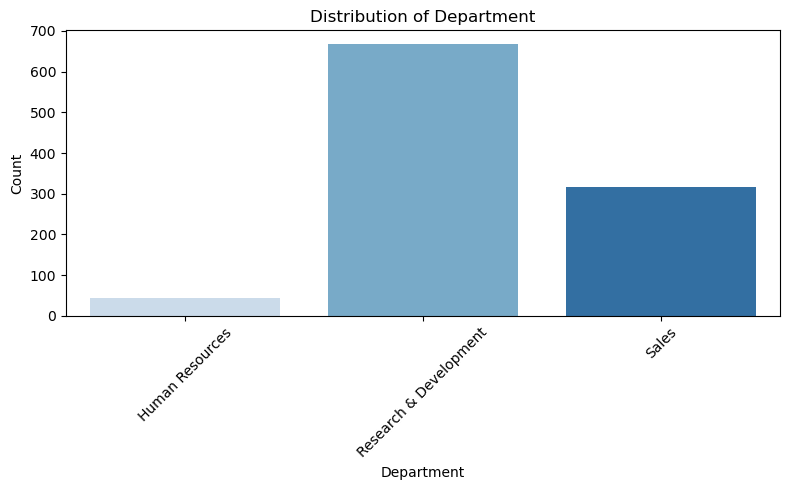

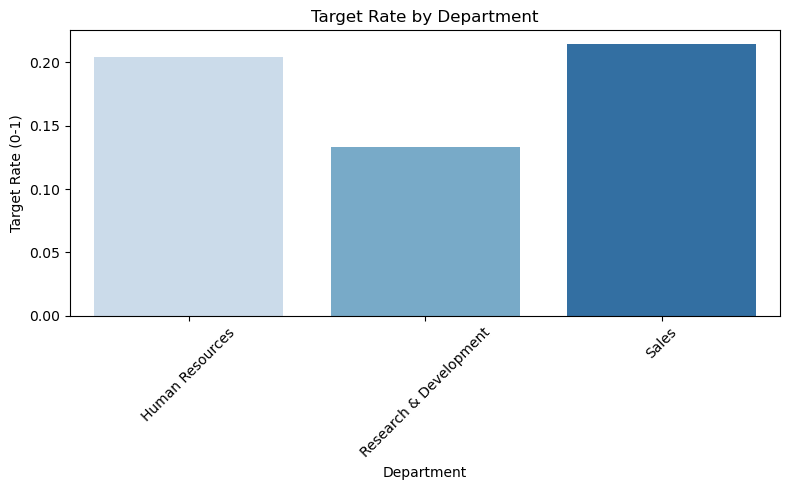

In [23]:
# Department
analyze_categorical_train(X_train, y_train, 'Department')

Count       %
JobRole                                 
Healthcare Representative     95   9.23%
Human Resources               37   3.60%
Laboratory Technician        182  17.69%
Manager                       74   7.19%
Manufacturing Director       101   9.82%
Research Director             54   5.25%
Research Scientist           195  18.95%
Sales Executive              239  23.23%
Sales Representative          52   5.05%

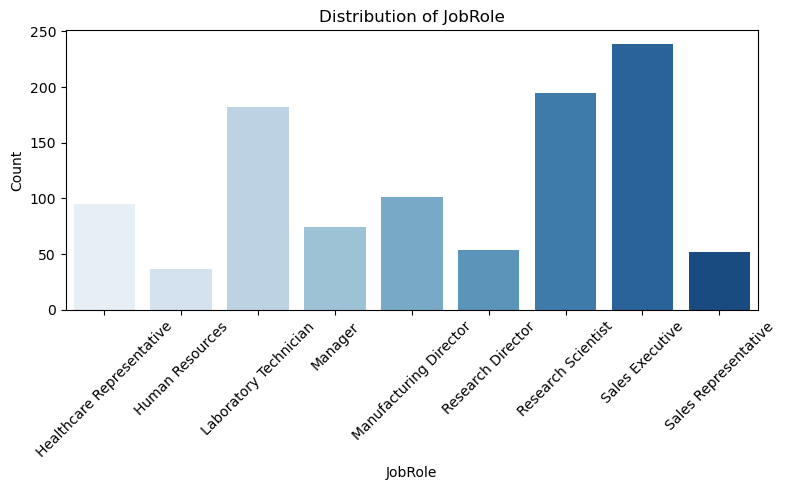

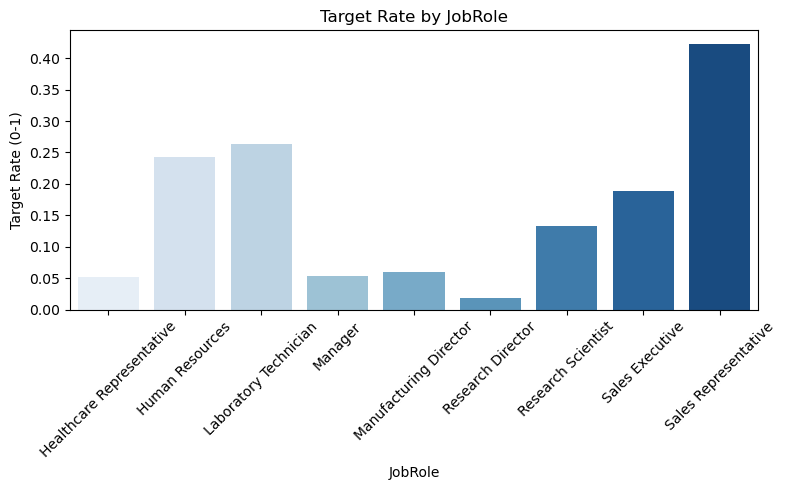

In [24]:
# Jobrole
analyze_categorical_train(X_train, y_train, 'JobRole')

Count       %
BusinessTravel                  
Non-Travel           112  10.88%
Travel_Frequently    185  17.98%
Travel_Rarely        732  71.14%

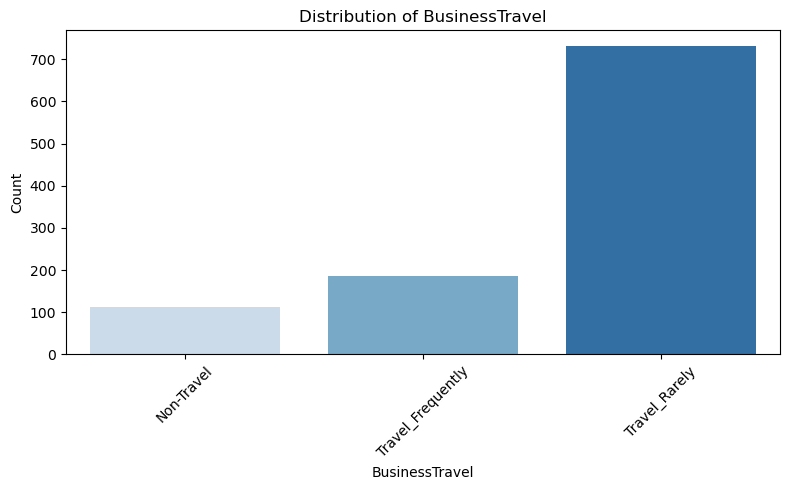

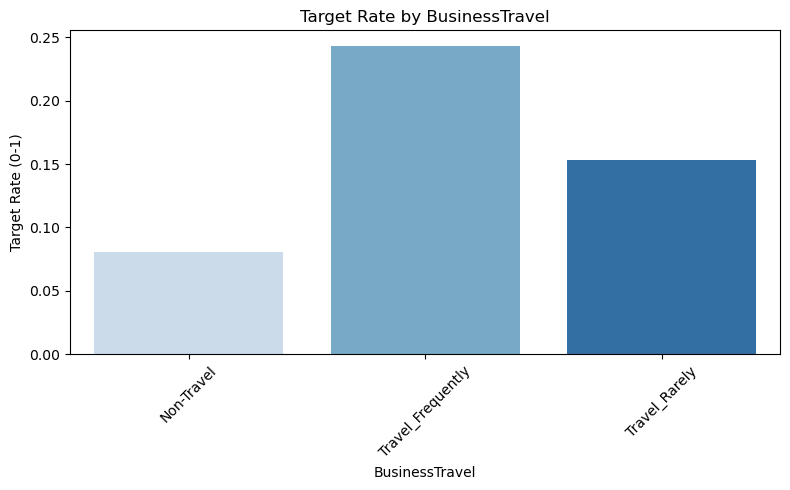

In [25]:
# BusinessTravel
analyze_categorical_train(X_train, y_train, 'BusinessTravel')

Count       %
OverTime               
No          727  70.65%
Yes         302  29.35%

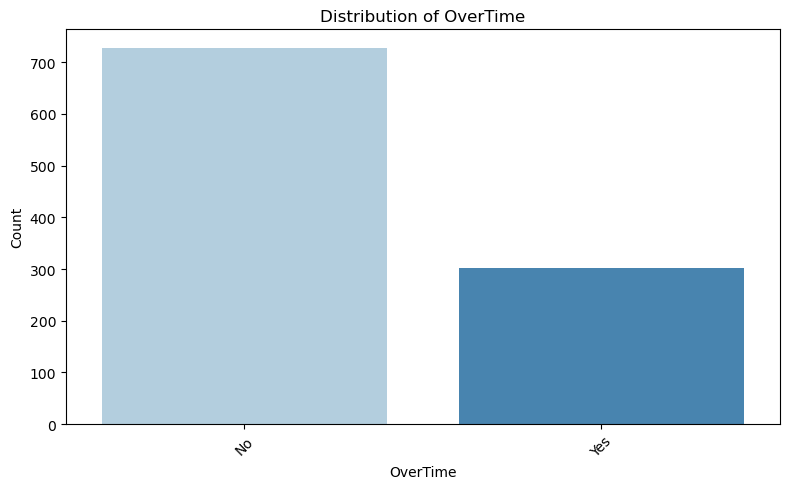

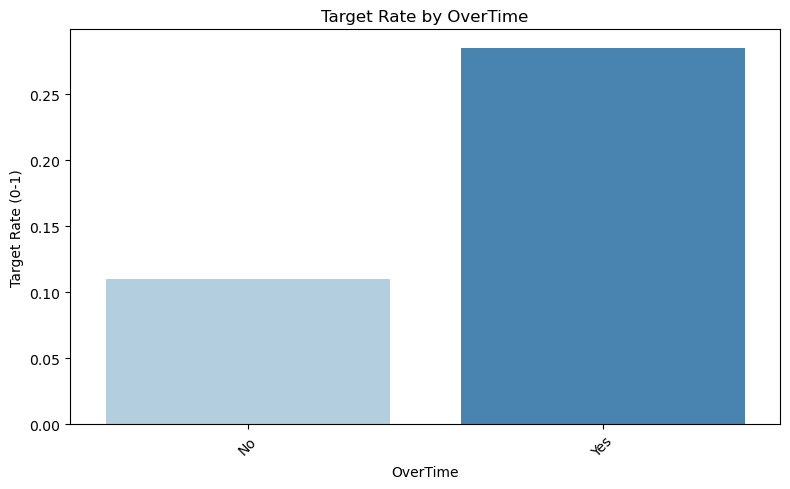

In [26]:
# OverTime
analyze_categorical_train(X_train, y_train, 'OverTime')

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **2.3 Numerical Variables** </font></a>

In [27]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    print(col)

Age
DailyRate
DistanceFromHome
Education
EmployeeNumber
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [28]:
def analyze_numerical_train(X_train, y_train, feature, bins=10):
    df = X_train.copy()
    df['Target'] = y_train
    
    # Summary statistics 
    display(df[feature].describe().to_frame().T)
    
    # Histogram 
    plt.figure(figsize=(8,5))
    if pd.api.types.is_integer_dtype(df[feature]):
        sns.histplot(df[feature], kde=False, discrete=True, color='skyblue')
    else:
        sns.histplot(df[feature], kde=False, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Target rate 
    # Convert target to numeric 
    if df['Target'].dtype == 'O':
        df['_target_numeric'] = df['Target'].map({'No':0, 'Yes':1})
    else:
        df['_target_numeric'] = df['Target']
    
    # Bin the numeric feature for plotting target rate
    df['bin'] = pd.qcut(df[feature], q=bins, duplicates='drop')
    rate = df.groupby('bin')['_target_numeric'].mean().reset_index()
    
    plt.figure(figsize=(8,5))
    sns.barplot(x='bin', y='_target_numeric', data=rate, color='steelblue')
    plt.xticks(rotation=45)
    plt.ylabel('Target Rate (0-1)')
    plt.title(f'Target Rate by {feature}')
    plt.tight_layout()
    plt.show()



count       mean       std   min   25%   50%   75%   max
Age  1029.0  36.945578  9.165414  18.0  30.0  36.0  43.0  60.0

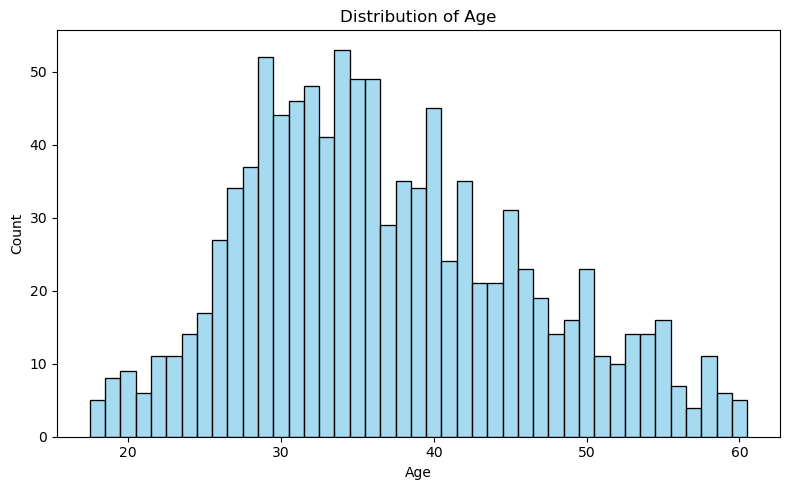

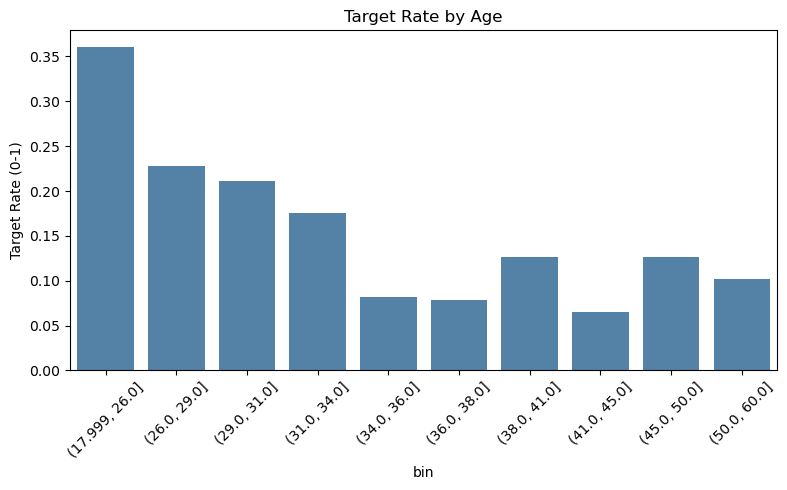

In [29]:
#Age
analyze_numerical_train(X_train, y_train, 'Age')


count        mean        std    min    25%    50%     75%     max
DailyRate  1029.0  809.543246  397.66673  103.0  479.0  805.0  1157.0  1499.0

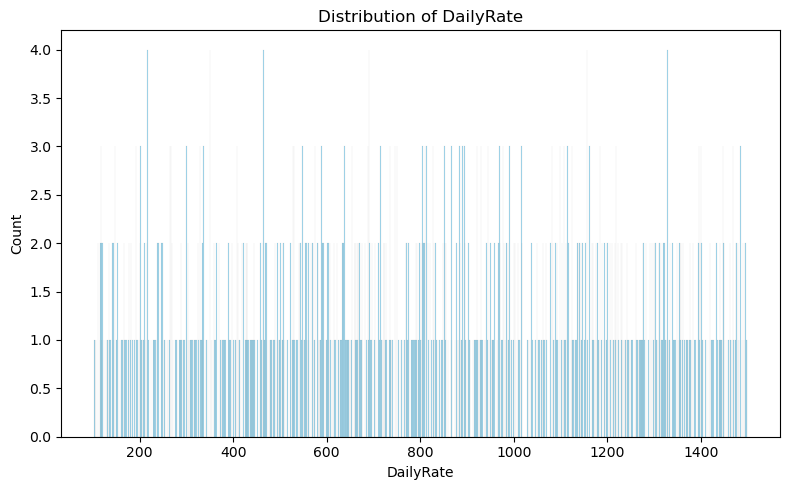

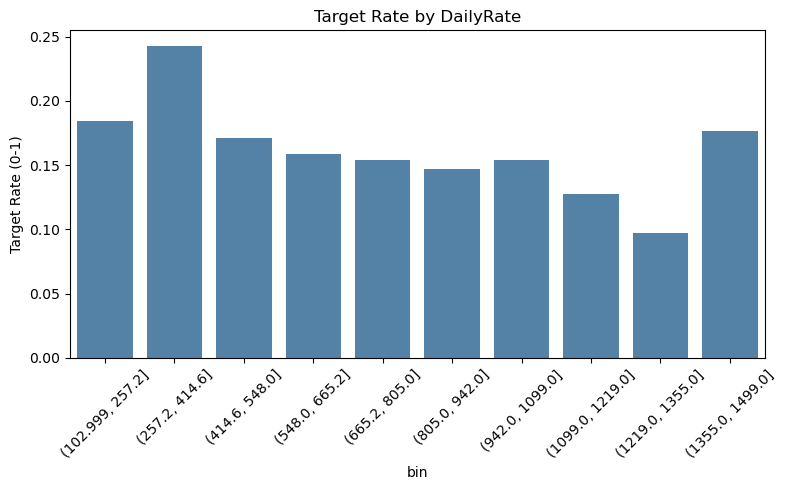

In [30]:
#DailyRate
analyze_numerical_train(X_train, y_train, 'DailyRate')

count      mean       std  min  25%  50%   75%   max
DistanceFromHome  1029.0  9.298348  8.160561  1.0  2.0  7.0  14.0  29.0

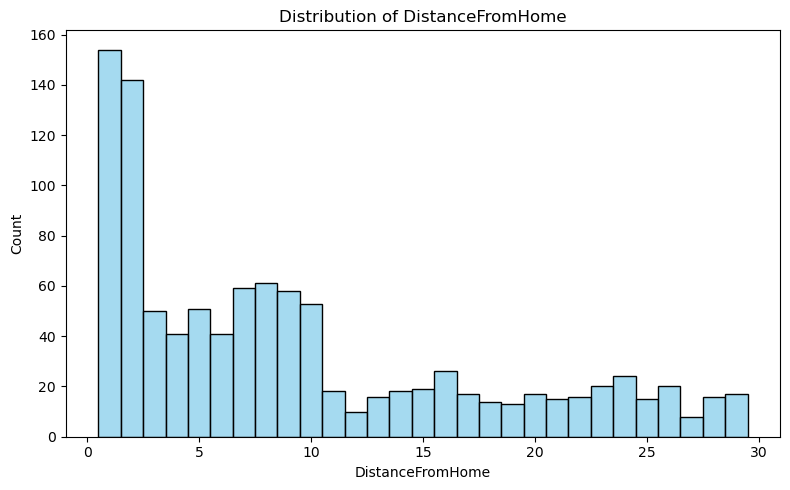

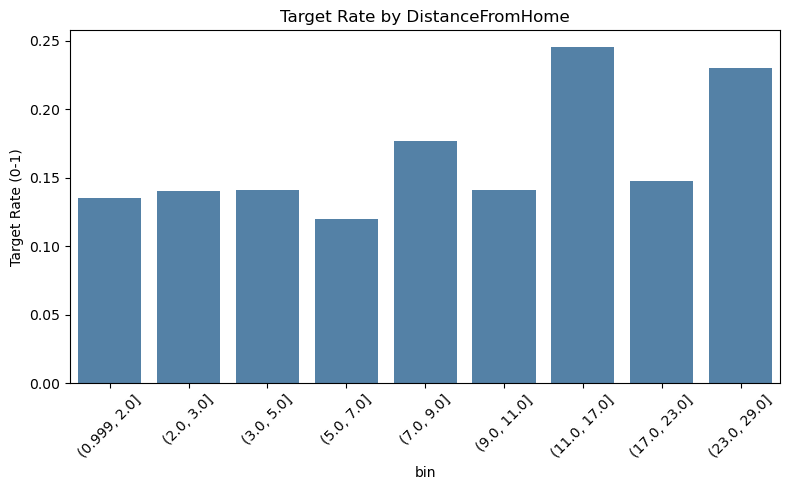

In [31]:
#DistanceFromHome
analyze_numerical_train(X_train, y_train, 'DistanceFromHome')

count    mean       std  min  25%  50%  75%  max
Education  1029.0  2.8931  1.031715  1.0  2.0  3.0  4.0  5.0

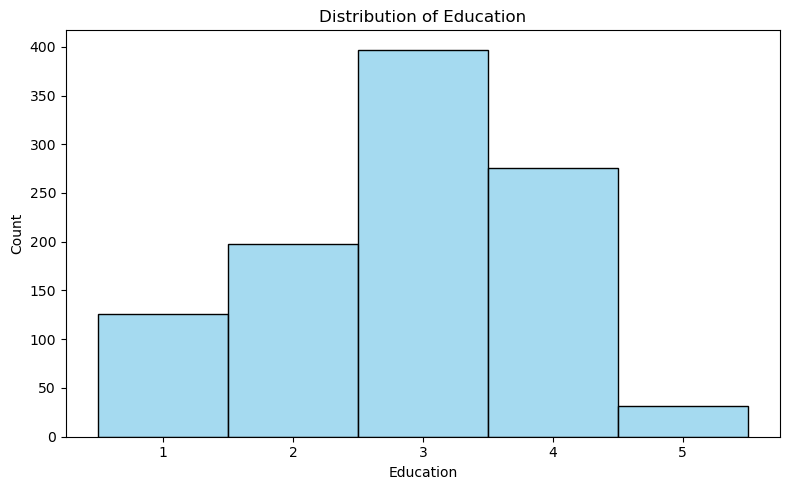

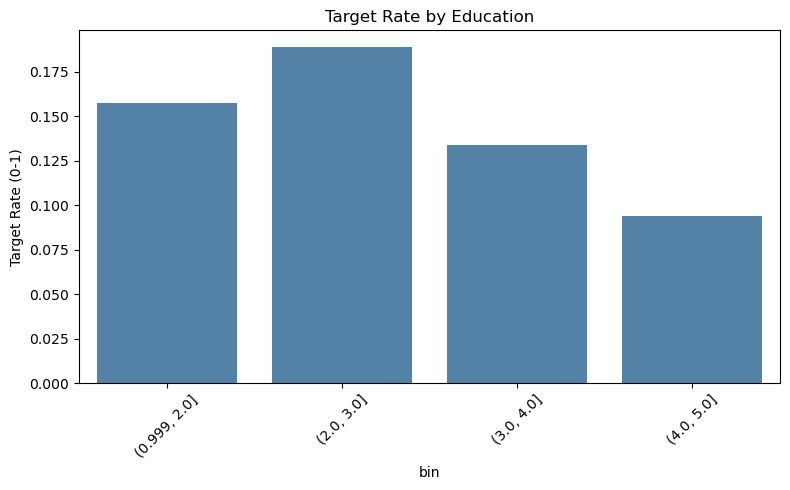

In [32]:
#Education
analyze_numerical_train(X_train, y_train, 'Education')

count      mean       std  min  25%  50%  75%  max
EnvironmentSatisfaction  1029.0  2.706511  1.085528  1.0  2.0  3.0  4.0  4.0

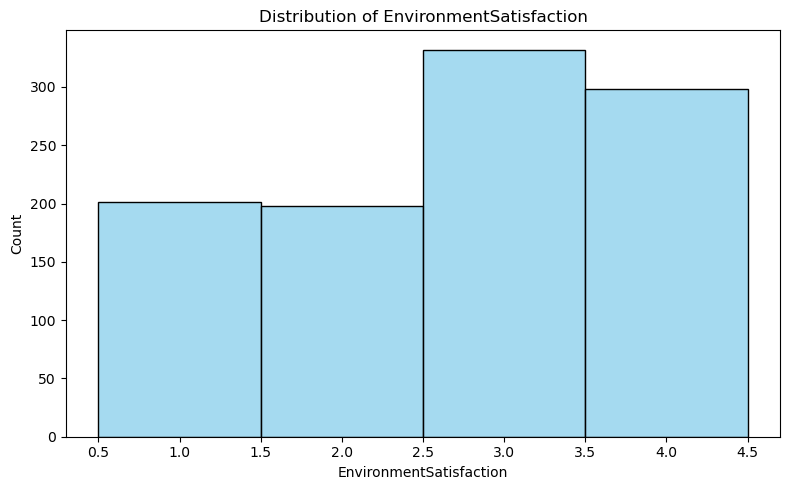

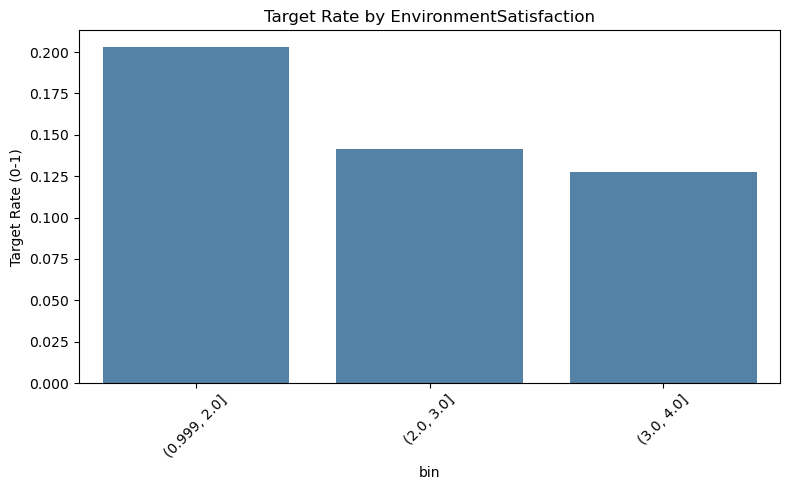

In [33]:
#EnvironmentSatisfaction
analyze_numerical_train(X_train, y_train, 'EnvironmentSatisfaction')


count       mean        std   min   25%   50%   75%    max
HourlyRate  1029.0  65.141885  20.345204  30.0  47.0  65.0  82.0  100.0

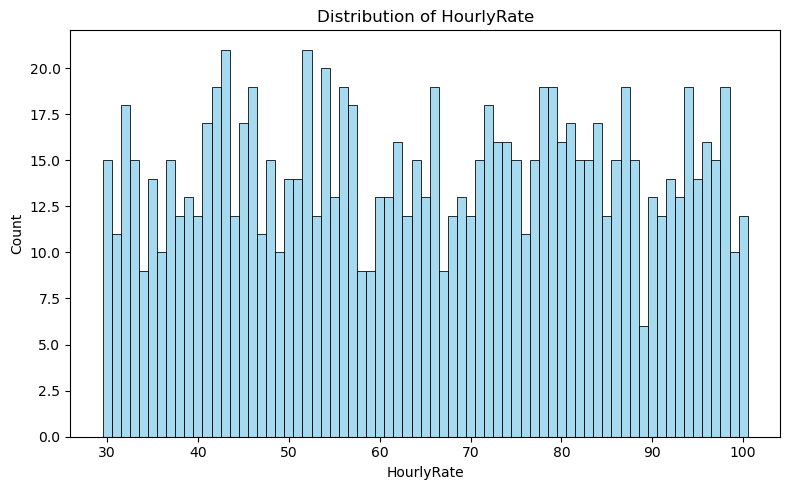

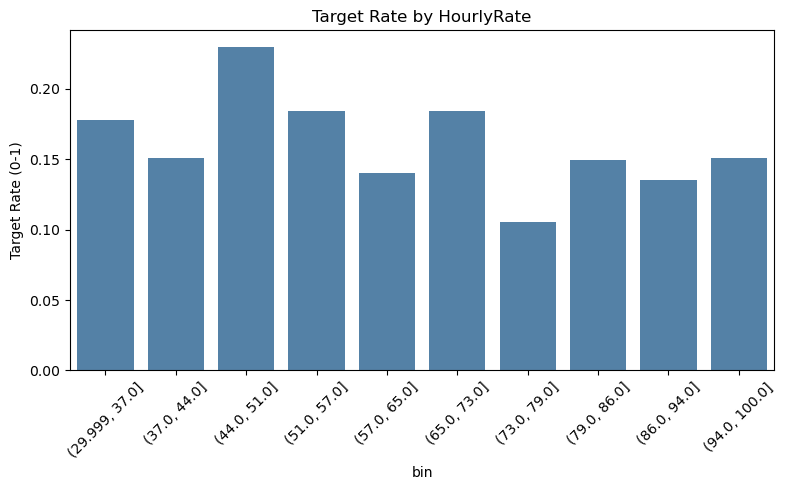

In [34]:
#HourlyRate
analyze_numerical_train(X_train, y_train, 'HourlyRate')


count      mean       std  min  25%  50%  75%  max
JobInvolvement  1029.0  2.731778  0.709833  1.0  2.0  3.0  3.0  4.0

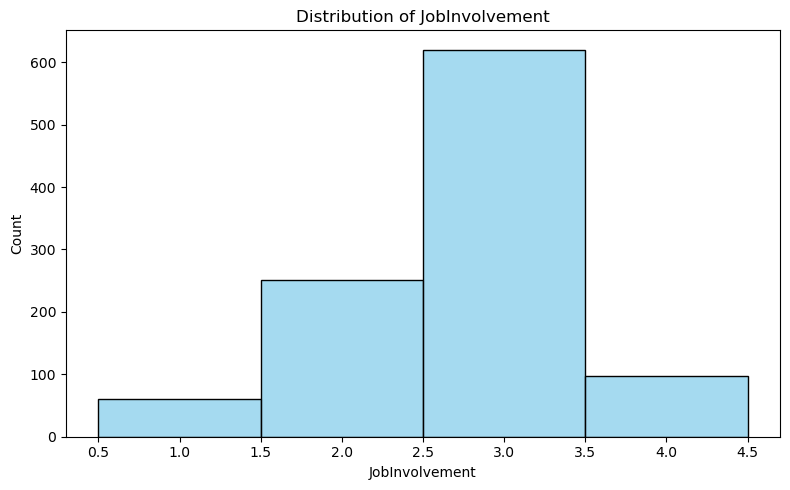

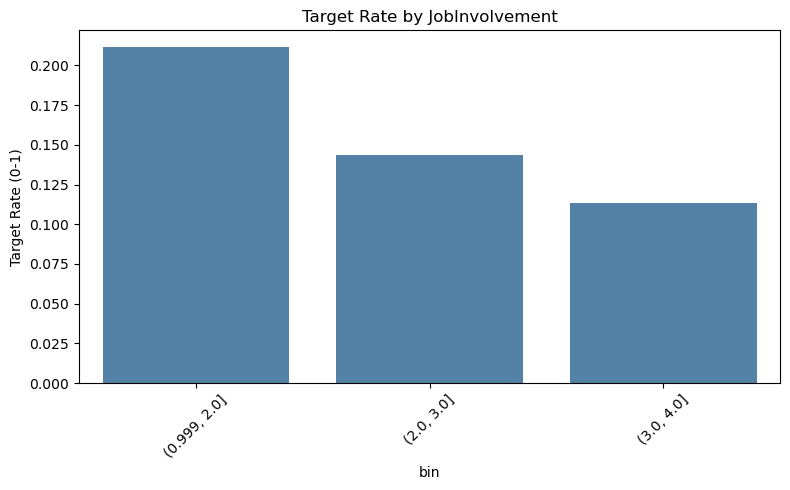

In [35]:
#JobInvolvement
analyze_numerical_train(X_train, y_train, 'JobInvolvement')


count      mean       std  min  25%  50%  75%  max
JobLevel  1029.0  2.082604  1.084906  1.0  1.0  2.0  3.0  5.0

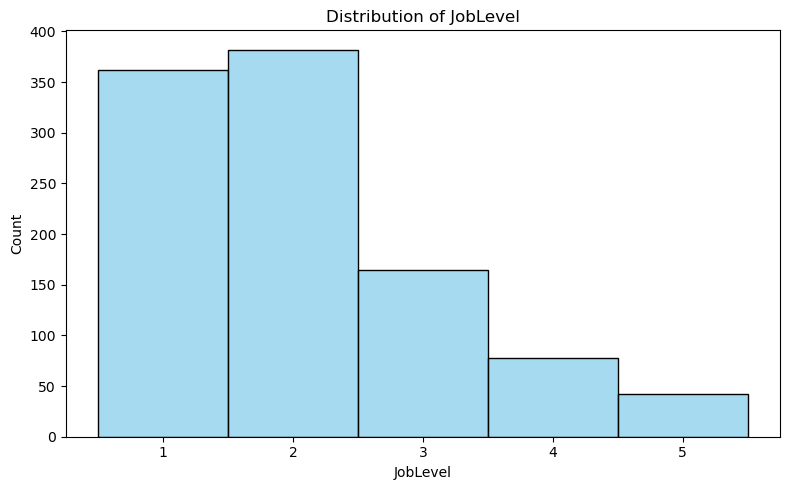

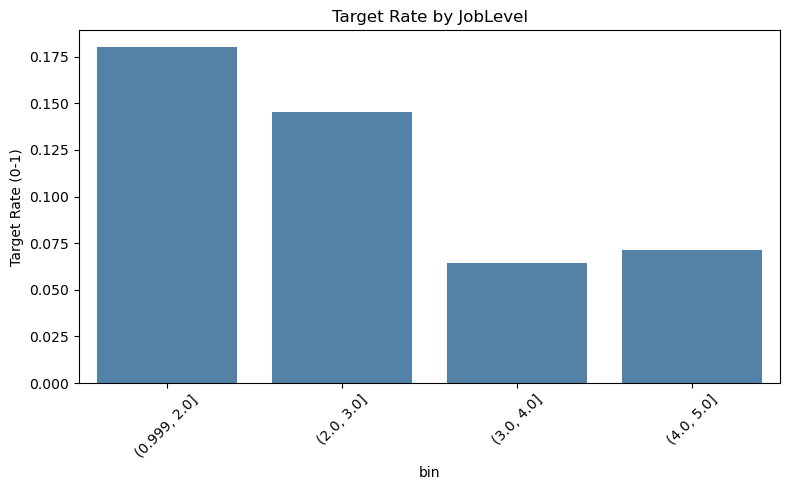

In [36]:
#JobLevel
analyze_numerical_train(X_train, y_train, 'JobLevel')

count      mean       std  min  25%  50%  75%  max
JobLevel  1029.0  2.082604  1.084906  1.0  1.0  2.0  3.0  5.0

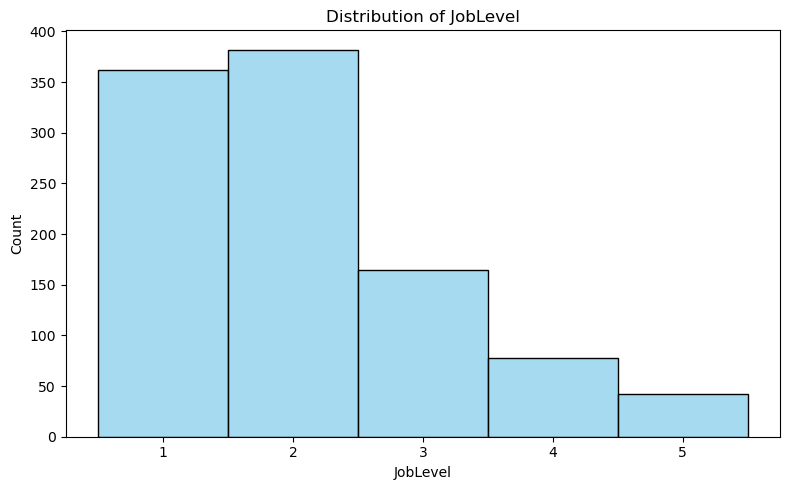

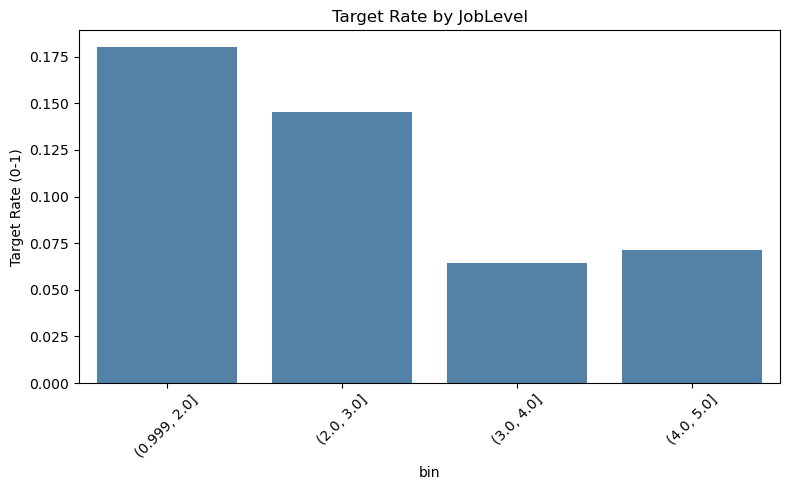

In [37]:
#JobLevel
analyze_numerical_train(X_train, y_train, 'JobLevel')

count      mean      std  min  25%  50%  75%  max
JobSatisfaction  1029.0  2.706511  1.10946  1.0  2.0  3.0  4.0  4.0

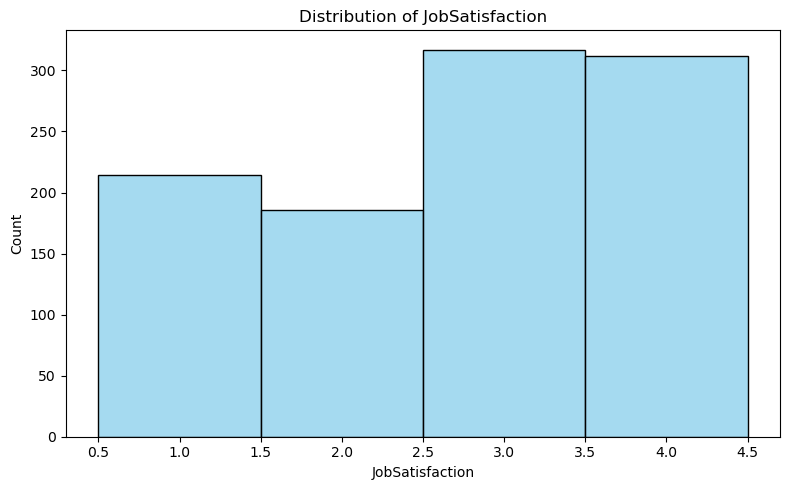

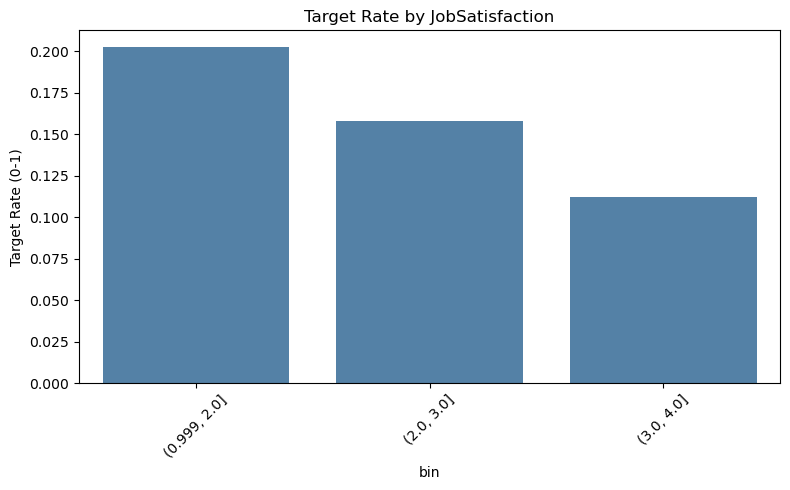

In [38]:
#JobSatisfaction
analyze_numerical_train(X_train, y_train, 'JobSatisfaction')


count         mean         std     min     25%     50%  \
MonthlyIncome  1029.0  6548.270165  4611.45961  1009.0  2994.0  5063.0   

                  75%      max  
MonthlyIncome  8446.0  19973.0

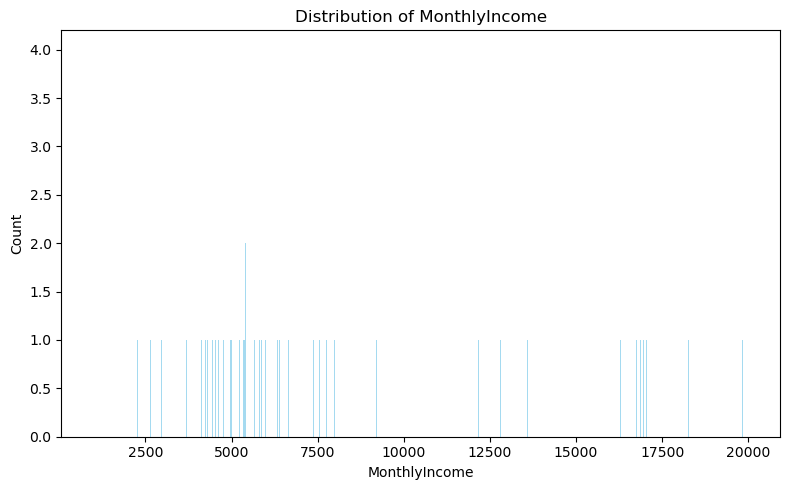

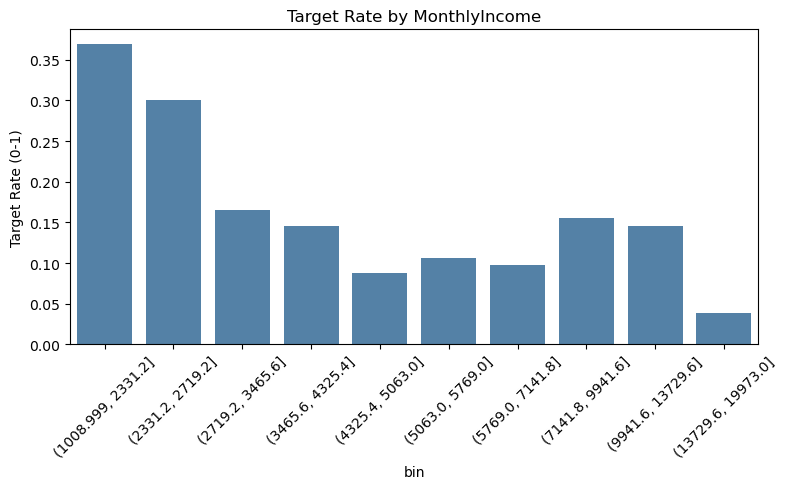

In [39]:
#MonthlyIncome
analyze_numerical_train(X_train, y_train, 'MonthlyIncome')


count          mean          std     min     25%      50%  \
MonthlyRate  1029.0  14465.365403  7231.472741  2094.0  8053.0  14506.0   

                 75%      max  
MonthlyRate  21016.0  26999.0

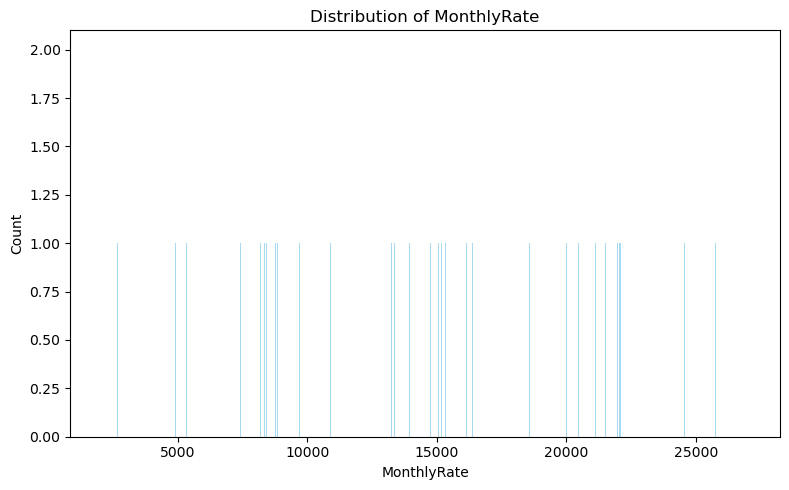

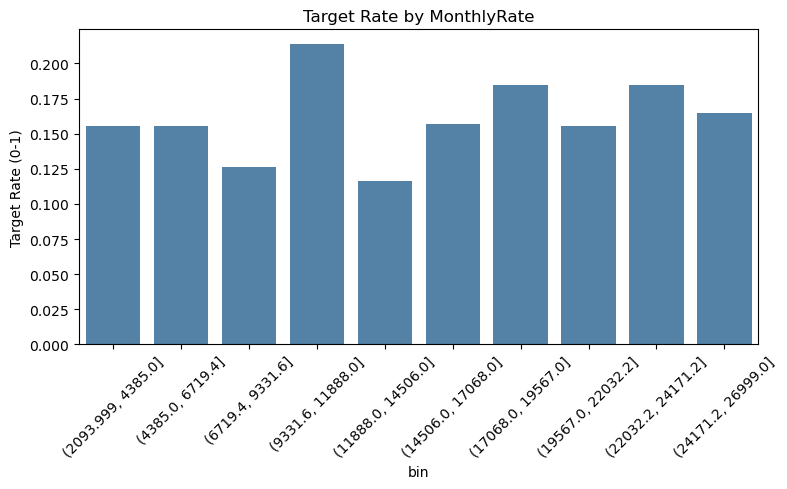

In [40]:
#MonthlyRate
analyze_numerical_train(X_train, y_train, 'MonthlyRate')

count      mean       std  min  25%  50%  75%  max
NumCompaniesWorked  1029.0  2.720117  2.497351  0.0  1.0  2.0  4.0  9.0

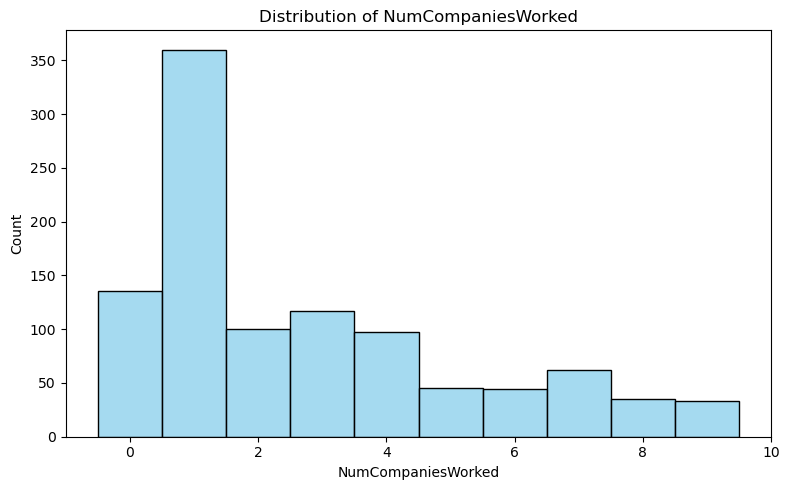

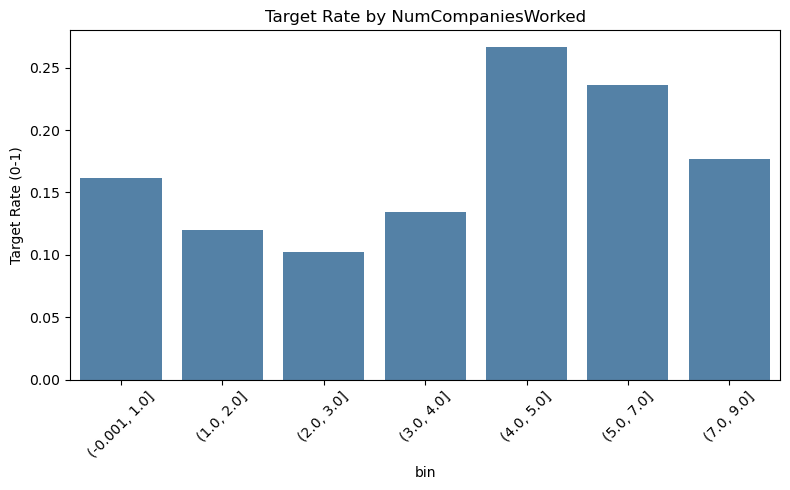

In [41]:
#NumCompaniesWorked
analyze_numerical_train(X_train, y_train, 'NumCompaniesWorked')

count       mean       std   min   25%   50%   75%   max
PercentSalaryHike  1029.0  15.196307  3.644241  11.0  12.0  14.0  18.0  25.0

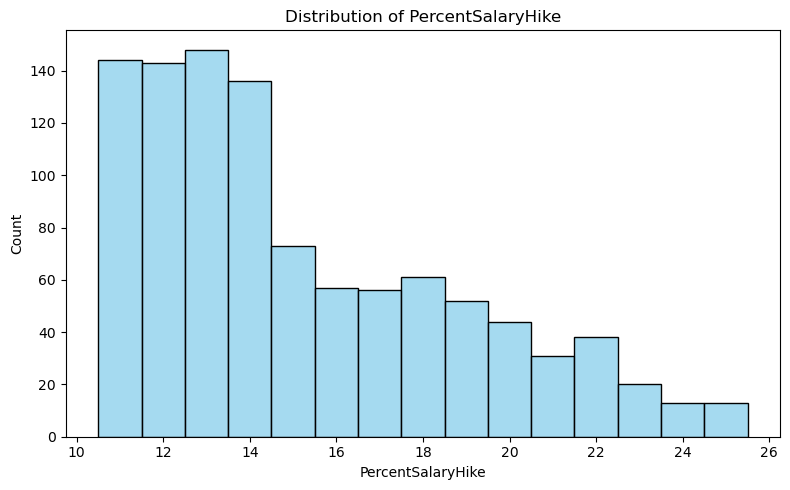

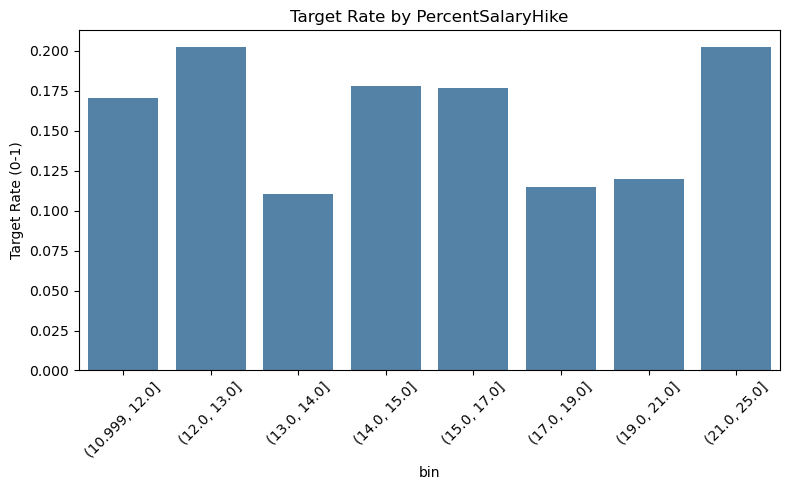

In [42]:
#PercentSalaryHike
analyze_numerical_train(X_train, y_train, 'PercentSalaryHike')

count      mean       std  min  25%  50%  75%  max
PerformanceRating  1029.0  3.154519  0.361621  3.0  3.0  3.0  3.0  4.0

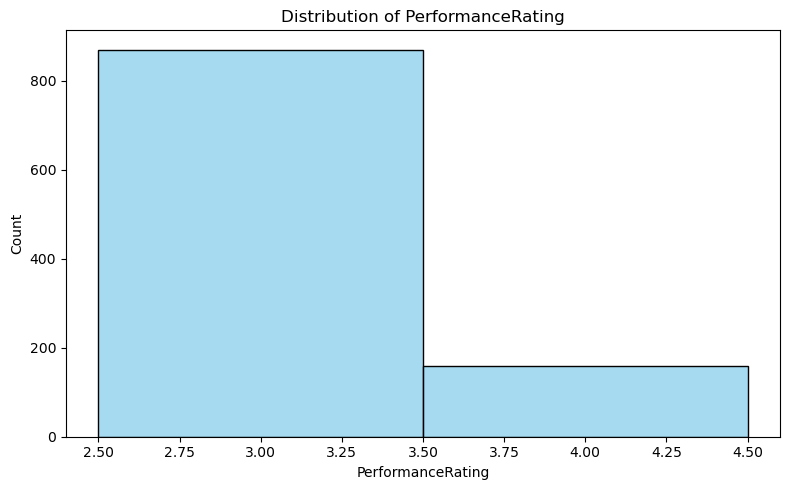

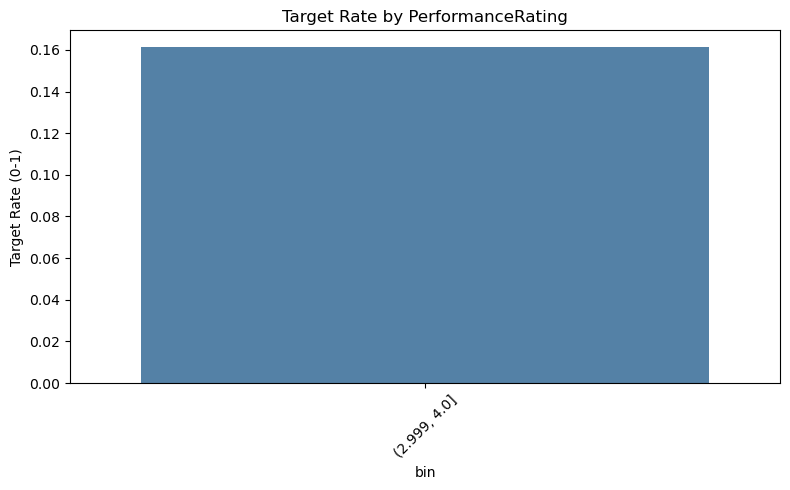

In [43]:
#PerformanceRating
analyze_numerical_train(X_train, y_train, 'PerformanceRating')

count      mean       std  min  25%  50%  75%  max
RelationshipSatisfaction  1029.0  2.744412  1.088398  1.0  2.0  3.0  4.0  4.0

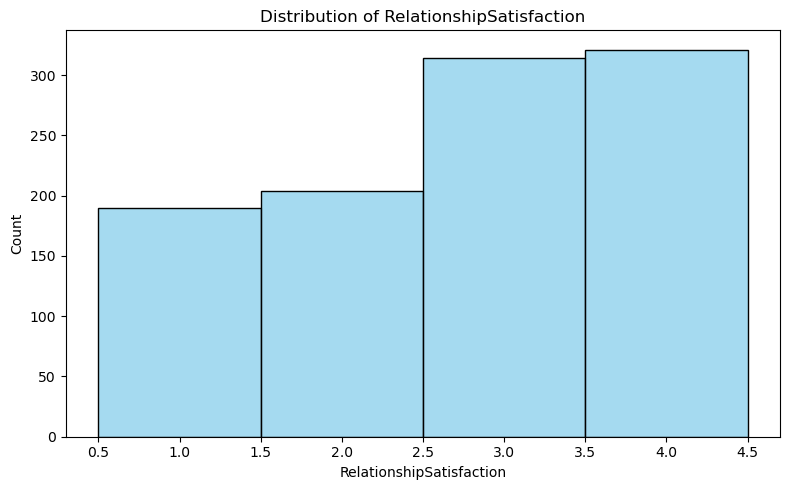

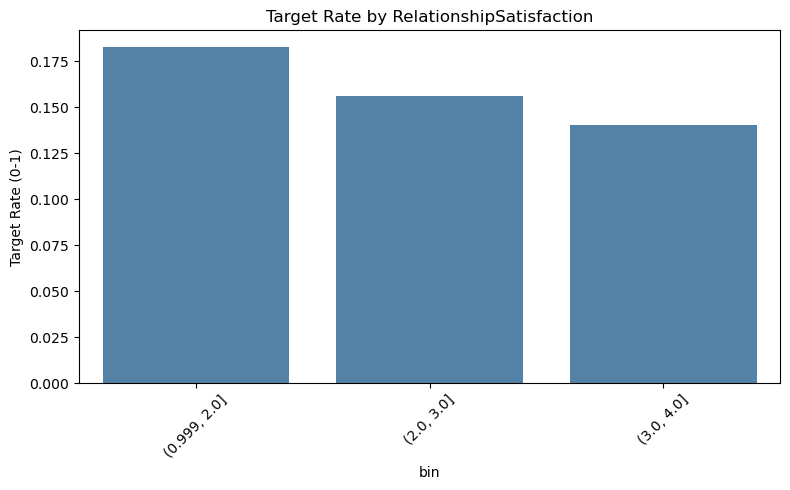

In [44]:
#RelationshipSatisfaction
analyze_numerical_train(X_train, y_train, 'RelationshipSatisfaction')

count      mean       std  min  25%  50%  75%  max
StockOptionLevel  1029.0  0.791059  0.846185  0.0  0.0  1.0  1.0  3.0

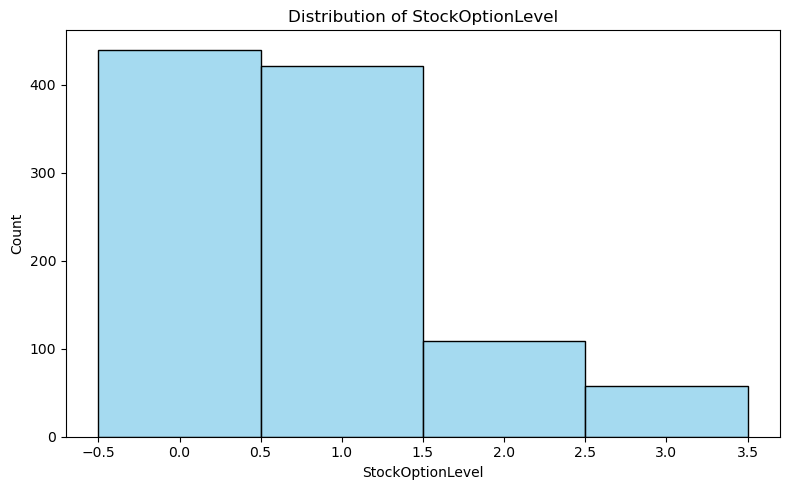

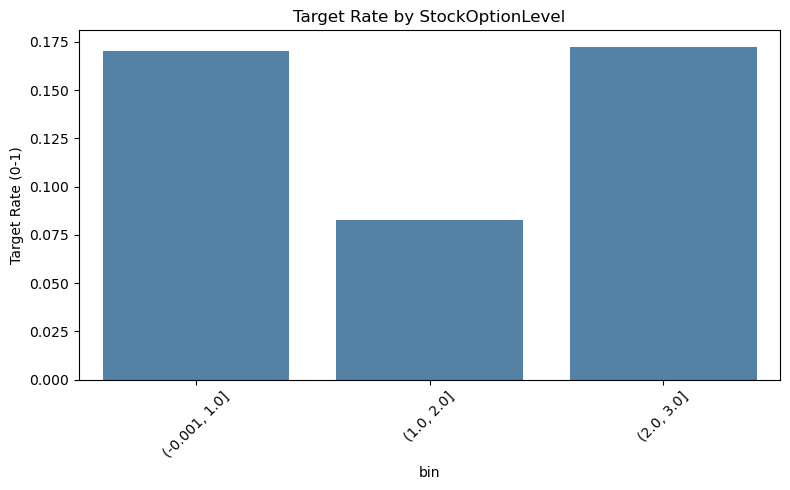

In [45]:
#StockOptionLevel
analyze_numerical_train(X_train, y_train, 'StockOptionLevel')

count       mean       std  min  25%   50%   75%   max
TotalWorkingYears  1029.0  11.323615  7.688945  0.0  6.0  10.0  15.0  40.0

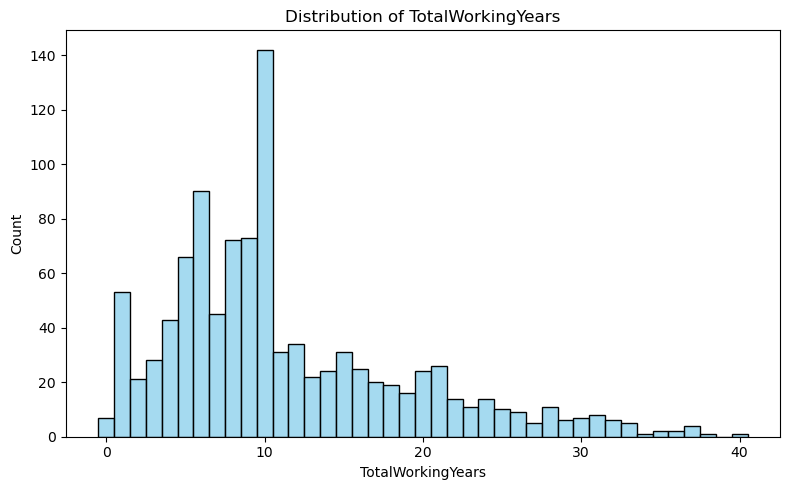

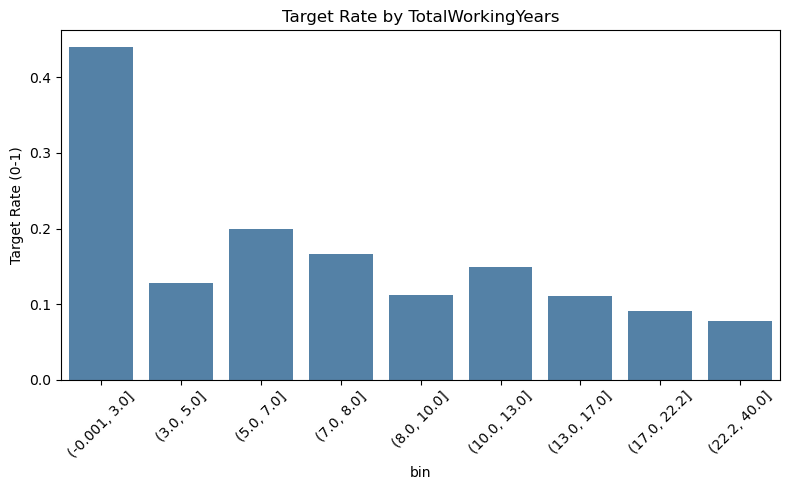

In [46]:
#TotalWorkingYears
analyze_numerical_train(X_train, y_train, 'TotalWorkingYears')


count      mean      std  min  25%  50%  75%  max
TrainingTimesLastYear  1029.0  2.741497  1.24023  0.0  2.0  3.0  3.0  6.0

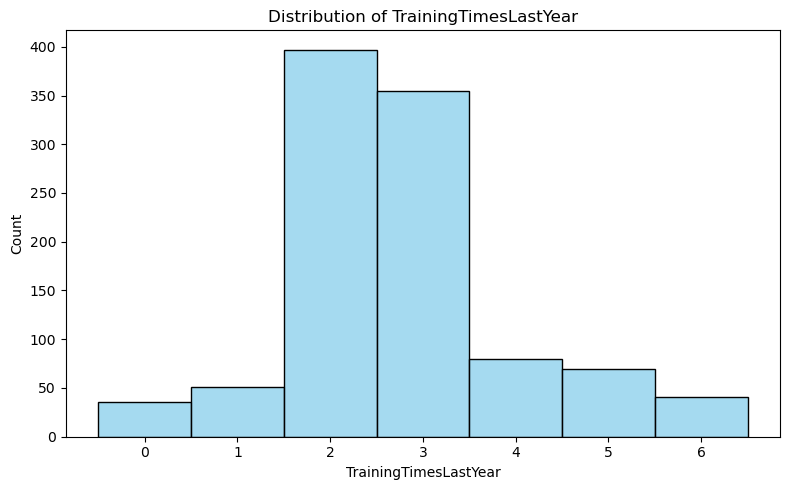

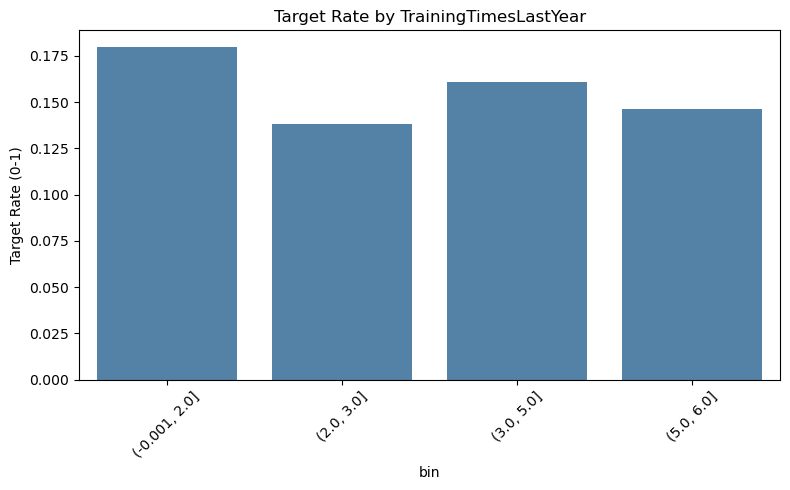

In [47]:
#TrainingTimesLastYear
analyze_numerical_train(X_train, y_train, 'TrainingTimesLastYear')

count      mean       std  min  25%  50%  75%  max
WorkLifeBalance  1029.0  2.759961  0.715116  1.0  2.0  3.0  3.0  4.0

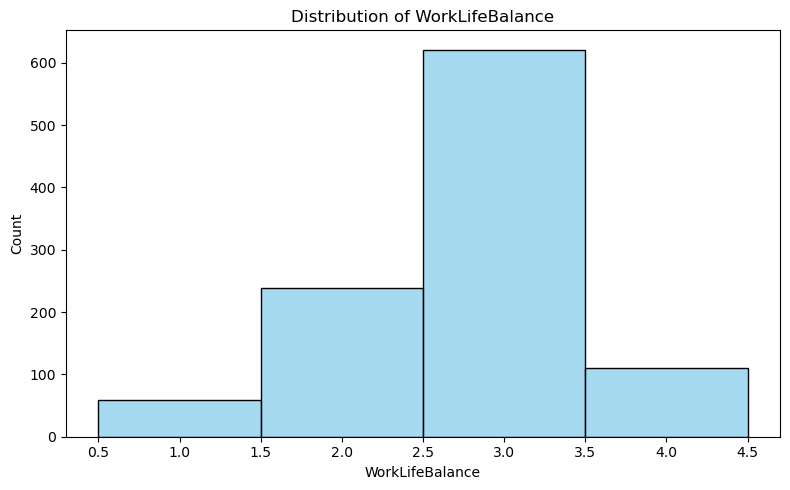

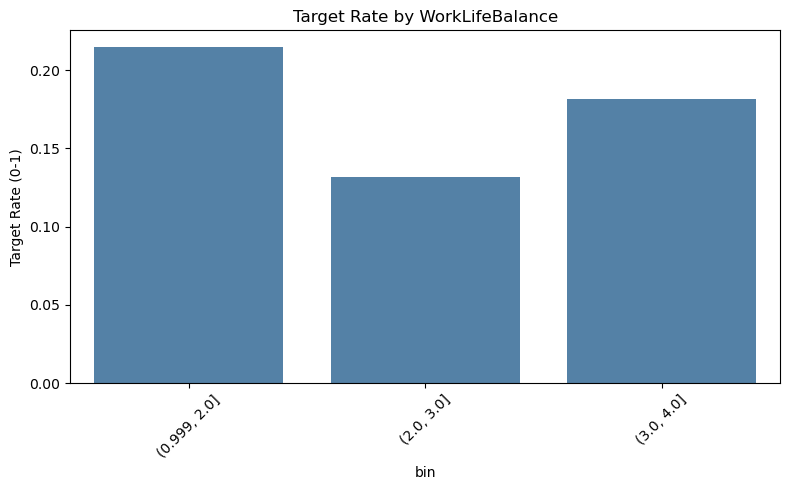

In [48]:
#WorkLifeBalance
analyze_numerical_train(X_train, y_train, 'WorkLifeBalance')

count      mean      std  min  25%  50%   75%   max
YearsAtCompany  1029.0  6.938776  5.95093  0.0  3.0  5.0  10.0  37.0

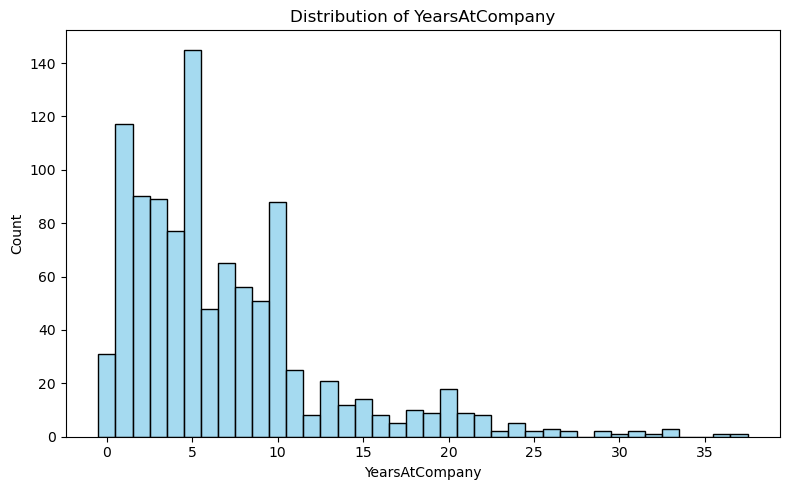

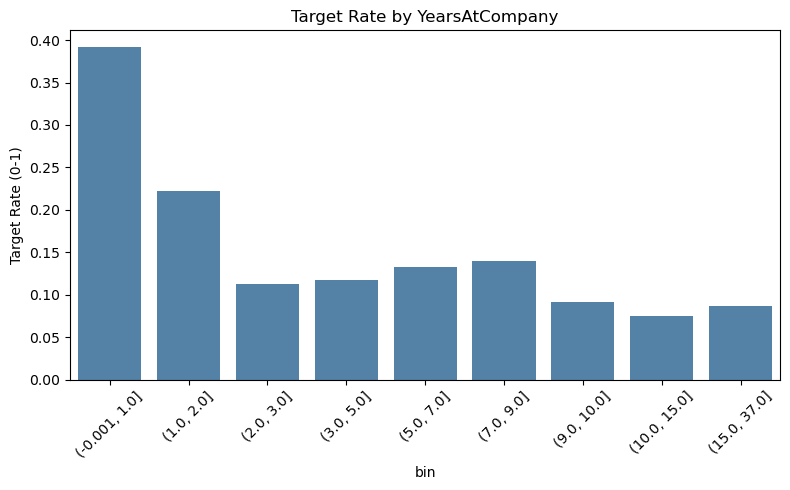

In [49]:
#YearsAtCompany
analyze_numerical_train(X_train, y_train, 'YearsAtCompany')


count      mean       std  min  25%  50%  75%   max
YearsInCurrentRole  1029.0  4.233236  3.583634  0.0  2.0  3.0  7.0  17.0

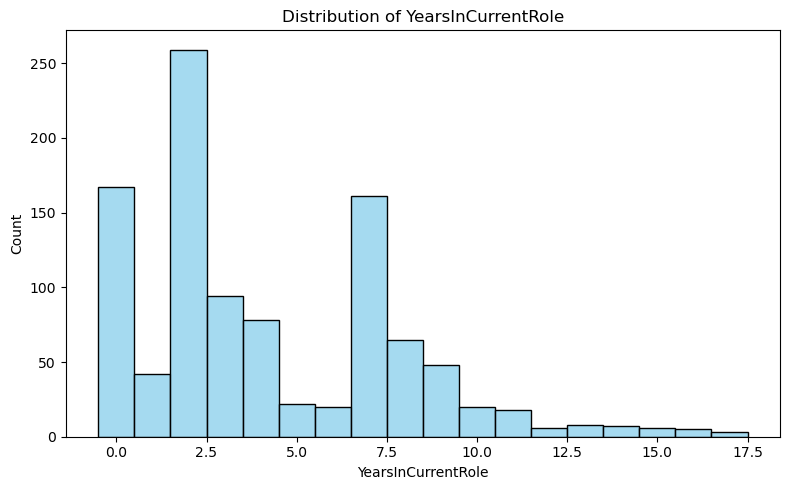

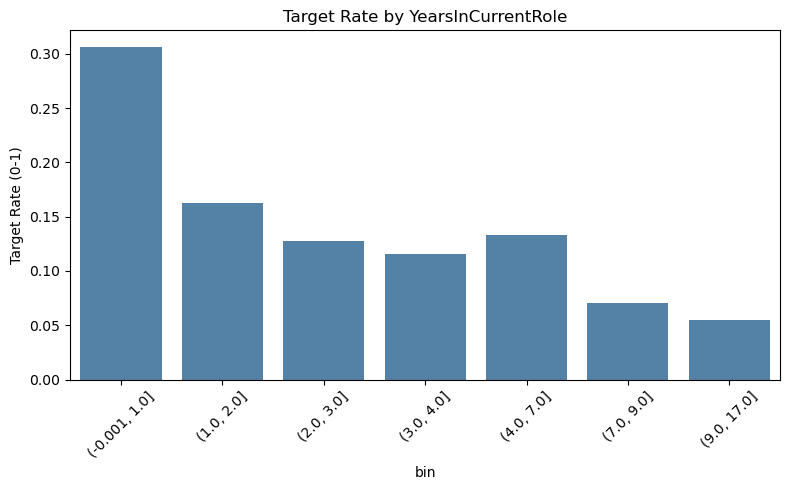

In [50]:
#YearsinCurrentRole
analyze_numerical_train(X_train, y_train, 'YearsInCurrentRole')

count      mean       std  min  25%  50%  75%   max
YearsSinceLastPromotion  1029.0  2.189504  3.222919  0.0  0.0  1.0  3.0  15.0

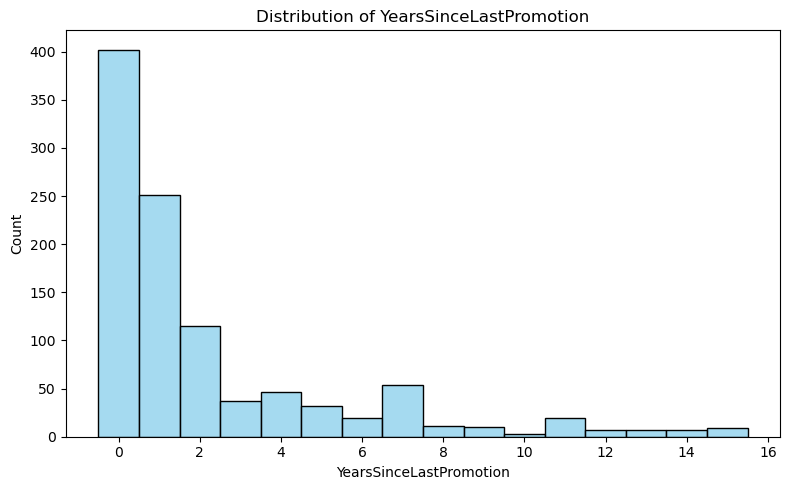

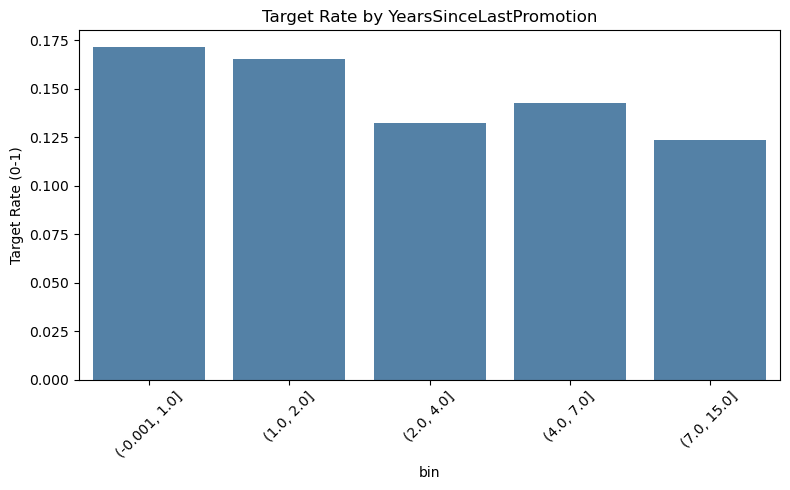

In [51]:
#YearsSinceLastPromotion
analyze_numerical_train(X_train, y_train, 'YearsSinceLastPromotion')

count      mean       std  min  25%  50%  75%   max
YearsWithCurrManager  1029.0  4.130224  3.535334  0.0  2.0  3.0  7.0  17.0

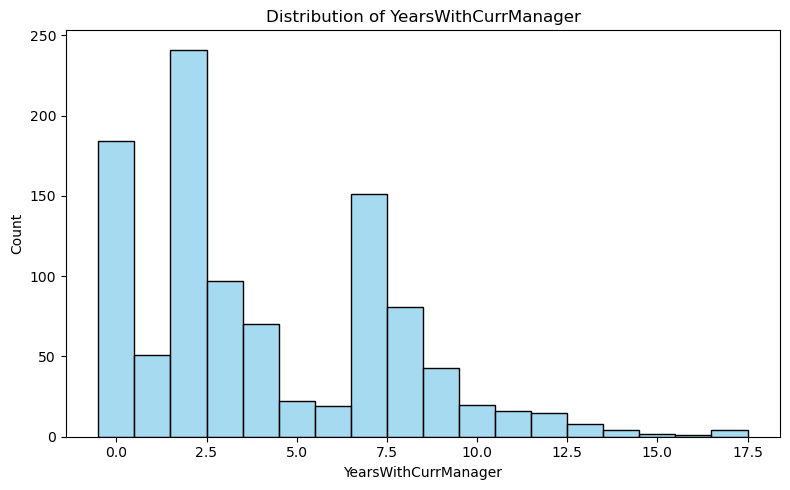

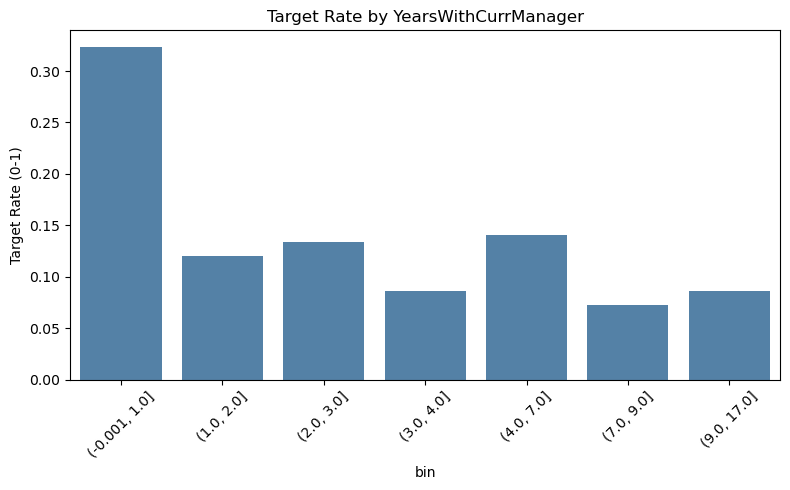

In [52]:
#YearsWithCurrManager
analyze_numerical_train(X_train, y_train, 'YearsWithCurrManager')

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **3.4 Correlation between Variables: Heatmap** </font></a>

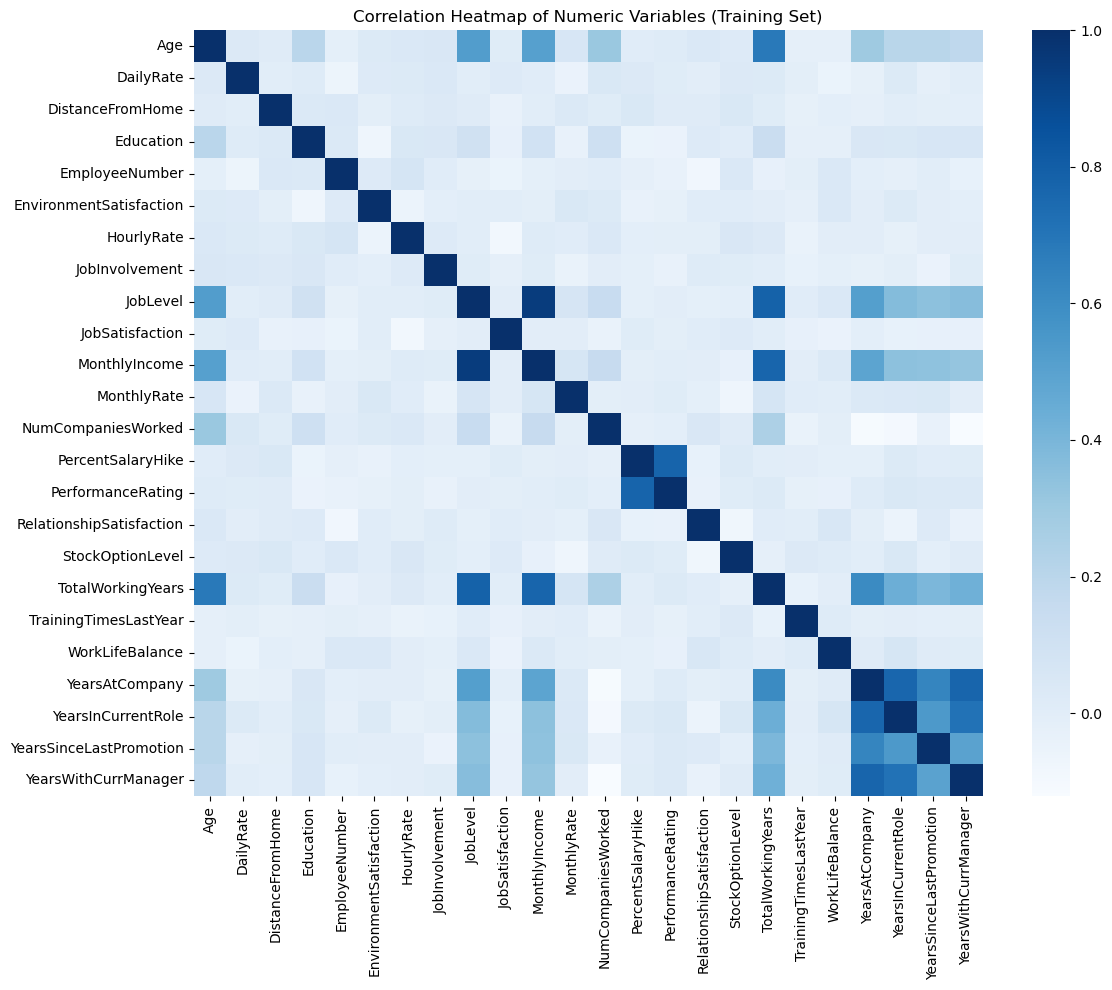

In [53]:
# Pearson Correlation

# Select numeric columns from training set
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 10))
sns.heatmap(
    X_train[numeric_cols].corr(),  # only training data
    cmap="Blues",
    annot=False
)
plt.title("Correlation Heatmap of Numeric Variables (Training Set)")
plt.tight_layout()
plt.show()


In [54]:
# Compute correlation matrix on numeric columns of training set
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
corr = X_train[numeric_cols].corr().abs()  # absolute values

# Only keep correlations above threshold but below 1 
threshold = 0.5
strong_corr = corr.where((corr > threshold) & (corr < 1.0)).stack().reset_index()
strong_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

print(strong_corr)




                 Variable 1               Variable 2  Correlation
0                       Age                 JobLevel     0.524321
1                       Age            MonthlyIncome     0.509772
2                       Age        TotalWorkingYears     0.687911
3                  JobLevel                      Age     0.524321
4                  JobLevel            MonthlyIncome     0.945943
5                  JobLevel        TotalWorkingYears     0.781716
6                  JobLevel           YearsAtCompany     0.514572
7             MonthlyIncome                      Age     0.509772
8             MonthlyIncome                 JobLevel     0.945943
9             MonthlyIncome        TotalWorkingYears     0.769714
10        PercentSalaryHike        PerformanceRating     0.773426
11        PerformanceRating        PercentSalaryHike     0.773426
12        TotalWorkingYears                      Age     0.687911
13        TotalWorkingYears                 JobLevel     0.781716
14        

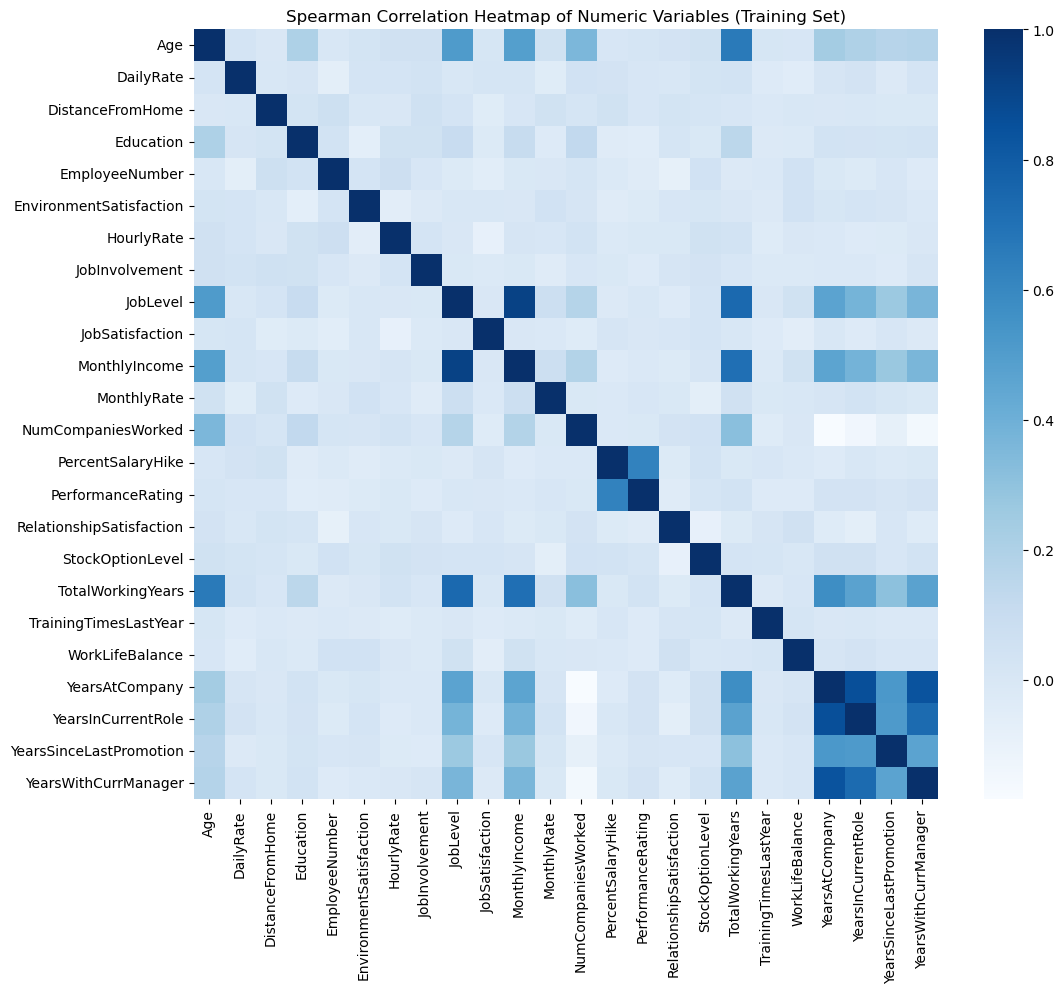

In [55]:
# Spearman correlation on numeric columns of training set
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
spearman_corr = X_train[numeric_cols].corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, cmap="Blues", annot=False)
plt.title("Spearman Correlation Heatmap of Numeric Variables (Training Set)")
plt.show()


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **3.5. Outliers** </font></a>

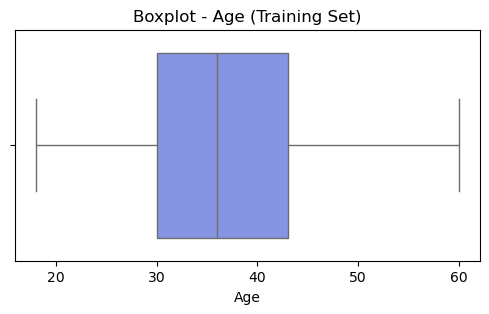

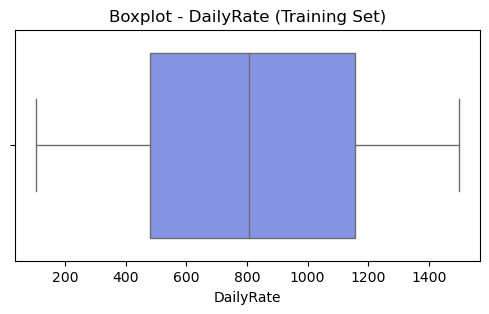

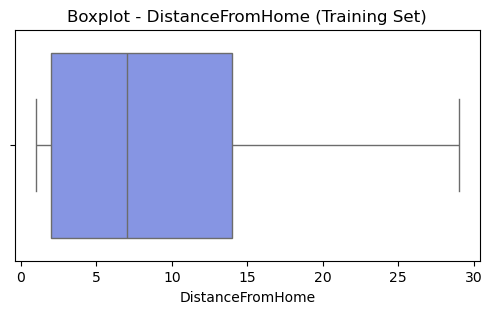

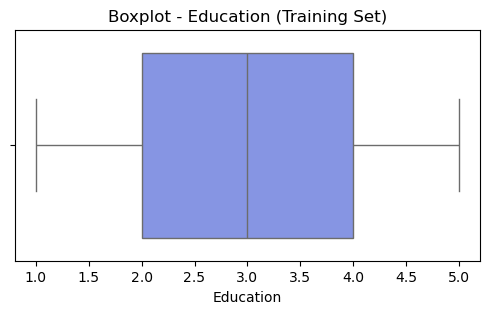

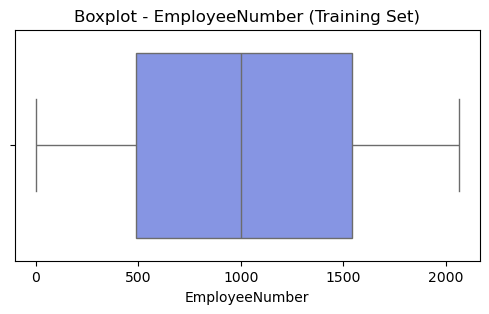

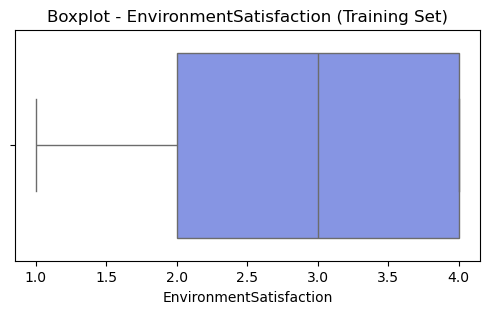

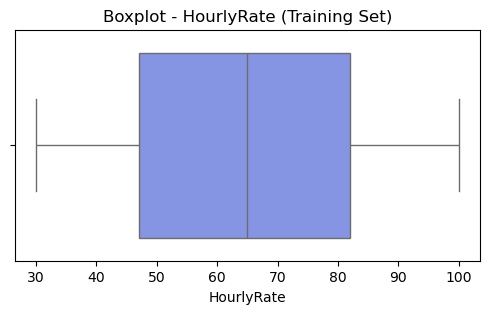

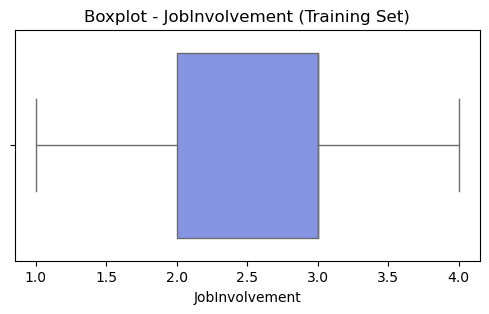

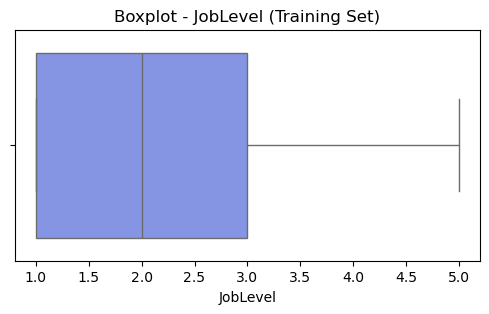

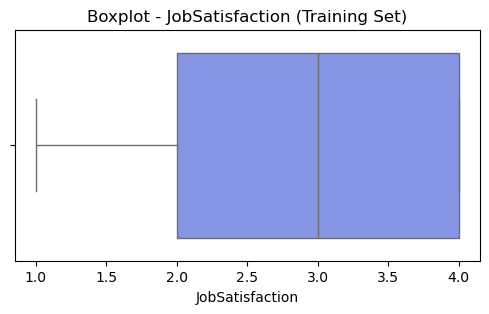

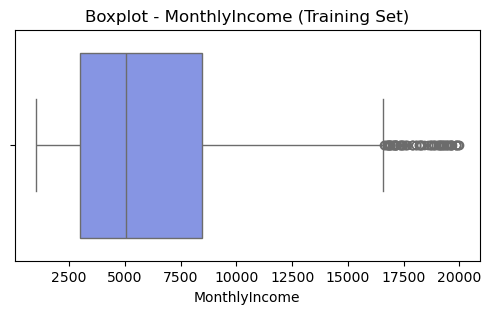

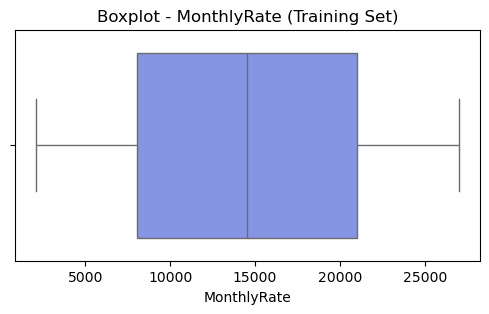

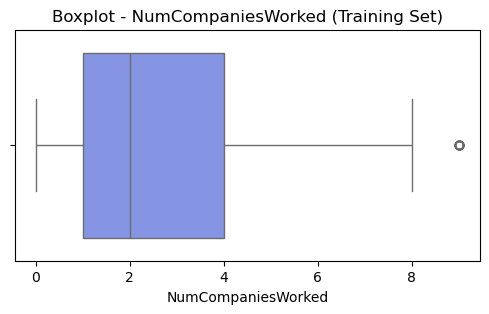

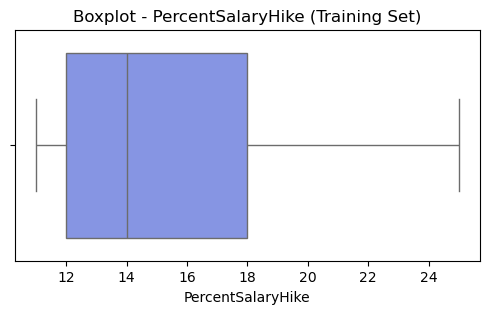

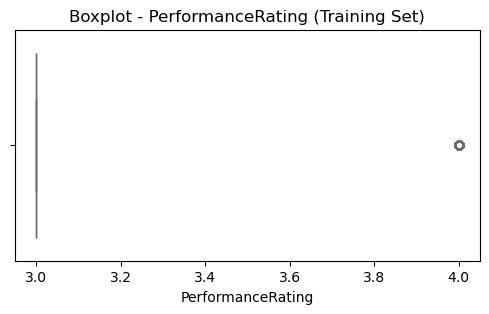

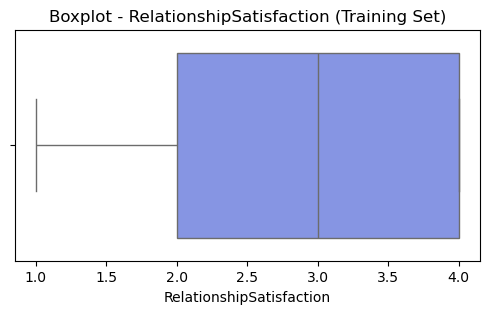

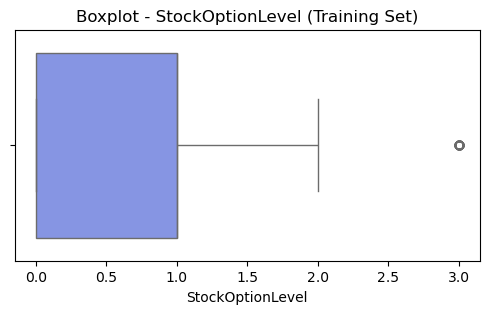

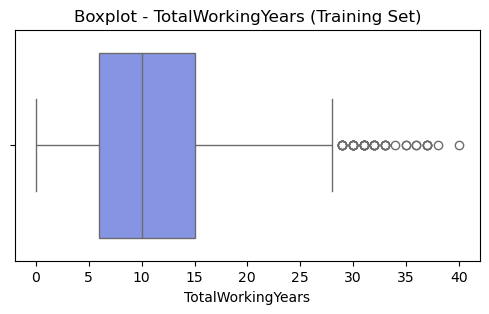

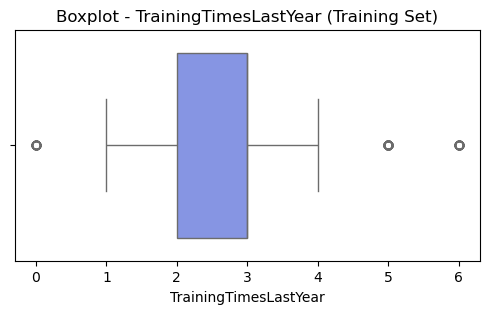

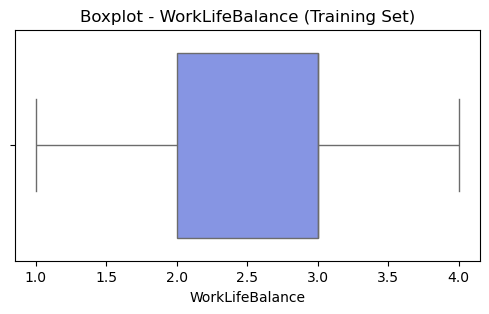

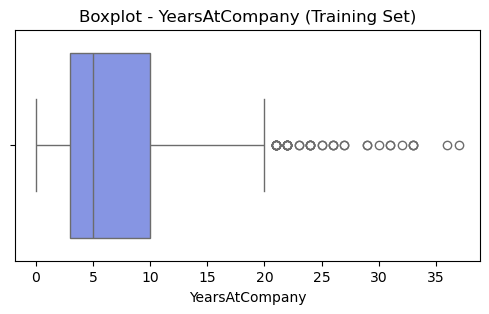

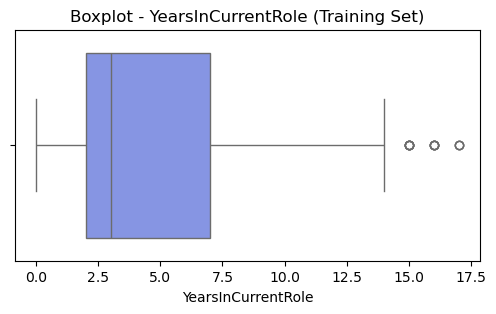

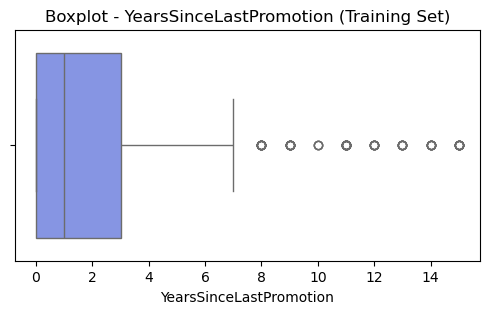

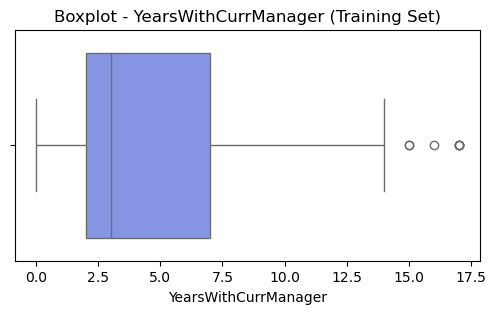

In [56]:
# Outlier detection on training set only
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=X_train[col], color="#778bf2ff")
    plt.title(f'Boxplot - {col} (Training Set)')
    plt.xlabel(col)
    plt.show()



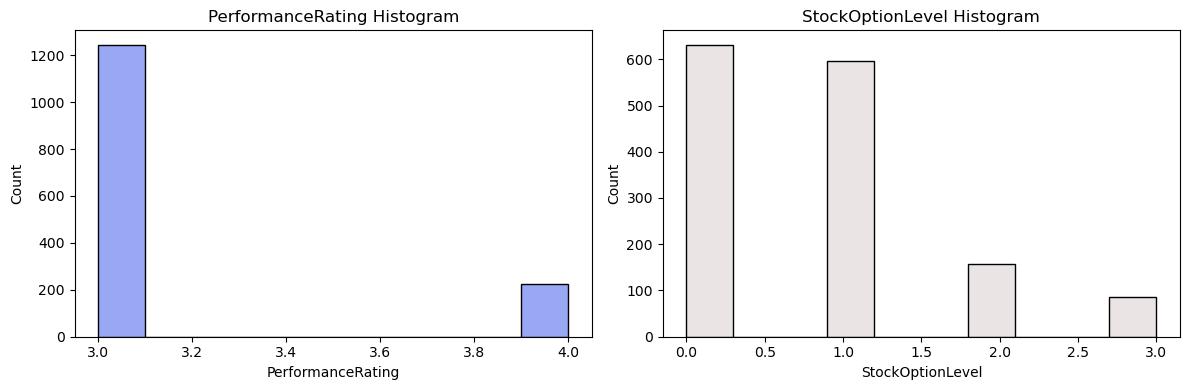

In [57]:
# Histograms for PerformanceRating and StockOptionLevel
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['PerformanceRating'], bins=10, ax=axes[0], color="#778bf2ff")
axes[0].set_title('PerformanceRating Histogram')
sns.histplot(df['StockOptionLevel'], bins=10, ax=axes[1], color ="#e4dcdcff")
axes[1].set_title('StockOptionLevel Histogram')
plt.tight_layout()
plt.show()



In [58]:
# Filter high performers in training set
high_perf_train = X_train[X_train['PerformanceRating'] > 3.8].copy()
high_perf_train['Attrition'] = y_train.loc[high_perf_train.index]

# Remaining employees in training set
rest_train = X_train.drop(high_perf_train.index).copy()
rest_train['Attrition'] = y_train.loc[rest_train.index]

# Columns to compare
cols_compare = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 
                'YearsSinceLastPromotion', 'OverTime']

# Function to summarize statistics
def summarize_stats(data, cols):
    summary = {}
    for col in cols:
        if col != 'OverTime':
            summary[col] = {
                'mean': data[col].mean(),
                'max': data[col].max(),
                'min': data[col].min()
            }
        else:
            # For OverTime, show proportion of 'Yes'
            summary[col] = {
                'OverTime_Yes (%)': (data[col] == 'Yes').mean() * 100
            }
    return pd.DataFrame(summary).T

print("High Performers (PerformanceRating > 3.8) - Training Set:")
display(summarize_stats(high_perf_train, cols_compare))

print("Other Employees - Training Set:")
display(summarize_stats(rest_train, cols_compare))


High Performers (PerformanceRating > 3.8) - Training Set:


mean      max     min  OverTime_Yes (%)
MonthlyIncome            6580.113208  19973.0  1102.0               NaN
TotalWorkingYears          11.817610     37.0     1.0               NaN
YearsAtCompany              7.194969     29.0     0.0               NaN
YearsSinceLastPromotion     2.471698     15.0     0.0               NaN
OverTime                         NaN      NaN     NaN         30.188679

Other Employees - Training Set:


mean      max     min  OverTime_Yes (%)
MonthlyIncome            6542.450575  19943.0  1009.0               NaN
TotalWorkingYears          11.233333     40.0     0.0               NaN
YearsAtCompany              6.891954     37.0     0.0               NaN
YearsSinceLastPromotion     2.137931     15.0     0.0               NaN
OverTime                         NaN      NaN     NaN         29.195402

In [59]:
# Add Attrition to X_train for convenience
train_data = X_train.copy()
train_data['Attrition'] = y_train

# Employees with YearsAtCompany = 40
print("Employee with YearsAtCompany = 40 (Training Set):")
display(train_data[train_data['YearsAtCompany'] == 40][
    ['EmployeeNumber', 'JobRole', 'Department', 'TotalWorkingYears', 
     'YearsInCurrentRole', 'PerformanceRating', 'StockOptionLevel', 'Attrition']
])

# Employees with TotalWorkingYears = 40
print("Employee with TotalWorkingYears = 40 (Training Set):")
display(train_data[train_data['TotalWorkingYears'] == 40][
    ['EmployeeNumber', 'JobRole', 'Department', 'YearsAtCompany', 
     'YearsInCurrentRole', 'PerformanceRating', 'StockOptionLevel', 'Attrition']
])

# Employees with YearsInCurrentRole = 18
print("Employee with YearsInCurrentRole = 18 (Training Set):")
display(train_data[train_data['YearsInCurrentRole'] == 18][
    ['EmployeeNumber', 'JobRole', 'Department', 'YearsAtCompany', 
     'TotalWorkingYears', 'PerformanceRating', 'StockOptionLevel', 'Attrition']
])


Employee with YearsAtCompany = 40 (Training Set):


Empty DataFrame
Columns: [EmployeeNumber, JobRole, Department, TotalWorkingYears, YearsInCurrentRole, PerformanceRating, StockOptionLevel, Attrition]
Index: []

Employee with TotalWorkingYears = 40 (Training Set):


EmployeeNumber            JobRole              Department  \
EmployeeNumber                                                              
825                        825  Research Director  Research & Development   

                YearsAtCompany  YearsInCurrentRole  PerformanceRating  \
EmployeeNumber                                                          
825                         31                  15                  3   

                StockOptionLevel Attrition  
EmployeeNumber                              
825                            0       Yes

Employee with YearsInCurrentRole = 18 (Training Set):


Empty DataFrame
Columns: [EmployeeNumber, JobRole, Department, YearsAtCompany, TotalWorkingYears, PerformanceRating, StockOptionLevel, Attrition]
Index: []

### Outlier Analysis — Summary & Conclusions

We analyzed several numeric variables that initially showed potential outliers in the boxplots compared with the target variable (`Attrition`):  
`MonthlyIncome`, `PerformanceRating`, `StockOptionLevel`, `TotalWorkingYears`, `TrainingTimesLastYear`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, and `YearsWithCurrManager`.

#### Phase 1 — General Variable Exploration
After re-examining these variables individually, two stood out: **PerformanceRating** and **StockOptionLevel**.  
Histograms of `PerformanceRating` revealed two distinct employee groups:
1. **Others:** 3.0 < `PerformanceRating` < 3.2  
2. **High Performers (h_perf):** 3.8 < `PerformanceRating` < 4.0  

For the 226 high performers (out of 1,470 employees), we compared several factors (`Attrition`, `MonthlyIncome`, `TotalWorkingYears`, `YearsAtCompany`, `YearsSinceLastPromotion`, `OverTime`, `JobRole`, and `Department`) against the rest of the population (1,244 employees).  
Key insights:
- **Attrition:** similar distribution between groups.  
- **MonthlyIncome:** very close across groups, suggesting performance is not linked to income levels.  
- **TotalWorkingYears** and **YearsSinceLastPromotion:** similar mean, min, and max values.  
- **OverTime:** comparable share (~28%) in both groups.  
- Most high performers belong to **Research & Development (156)**, followed by **Sales (61)** and **HR (9)**.  

**Conclusion (PerformanceRating):**  
No significant correlations were found between high performance (>3.8) and other variables — consistent with the heatmap, where `PerformanceRating` showed no strong associations across the dataset.

---

#### Phase 2 — Specific Employee Cases
A few employees showed extreme but contextually valid values:
1. **YearsAtCompany = 40:** single employee, `Attrition = Yes` (likely retirement).  
2. **TotalWorkingYears = 40:** two employees (one same as above), both with `Attrition = Yes` — probable retirements.  
3. **YearsInCurrentRole = 18:** two employees with long tenure (20 and 33 years), both still active.  
_All four are from the **Research & Development** department and have a `PerformanceRating = 3`._

**Conclusion (Tenure-related variables):**  
Long tenure in the company, role, or overall career does not indicate data errors — these represent valid senior employees, possibly close to or at retirement age.

---

### General Conclusions
1. Although some extreme values were detected, **none were considered true outliers** in the business context.  
2. The extreme cases (high tenure or high performance) are **consistent with realistic employee profiles** rather than data entry errors.  
3. Removing these values would risk losing meaningful information about experienced or high-performing staff.  
4. Therefore, **no outlier removal or transformation** is recommended at this stage.



<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **4. Data Transformation** </font></a>

In [60]:
# 1. Boolean Mapping for target and OverTime
bool_map = {'Yes': 1, 'No': 0, True: 1, False: 0}
y_train = y_train.map(bool_map)
y_val = y_val.map(bool_map)
y_test = y_test.map(bool_map)

# Apply same mapping to OverTime if it exists
for dataset in [X_train, X_val, X_test]:
    if 'OverTime' in dataset.columns:
        dataset['OverTime'] = dataset['OverTime'].map(bool_map)

# --- 2. Ordinal Encoding ---
from sklearn.preprocessing import OrdinalEncoder

# Columns to encode
ordinal_cols = ['BusinessTravel', 'Department', 'EducationField',
                'Gender', 'JobRole', 'MaritalStatus']

# Your mapping dictionaries
ordinal_maps = {
    'BusinessTravel': {'Non-Travel': 1, 'Travel_Frequently': 2, 'Travel_Rarely': 3},
    'Department': {'Human Resources': 1, 'Research & Development': 2, 'Sales': 3},
    'EducationField': {'Human Resources': 1, 'Life Sciences': 2, 'Marketing': 3,
                       'Medical': 4, 'Other': 5, 'Technical Degree': 6},
    'Gender': {'Female': 1, 'Male': 2},
    'JobRole': {'Healthcare Representative': 1, 'Human Resources': 2,
                'Laboratory Technician': 3, 'Manager': 4, 'Manufacturing Director': 5,
                'Research Director': 6, 'Research Scientist': 7, 'Sales Executive': 8,
                'Sales Representative': 9},
    'MaritalStatus': {'Divorced': 1, 'Married': 2, 'Single': 3}
}

# Create an OrdinalEncoder with the correct category order
ordinal_encoder = OrdinalEncoder(
    categories=[list(ordinal_maps[col].keys()) for col in ordinal_cols]
)

# Fit on training data
X_train[ordinal_cols] = ordinal_encoder.fit_transform(X_train[ordinal_cols])

# Transform validation and test sets
X_val[ordinal_cols] = ordinal_encoder.transform(X_val[ordinal_cols])
X_test[ordinal_cols] = ordinal_encoder.transform(X_test[ordinal_cols])

# Add 1 to match your 1-based mapping (optional)
X_train[ordinal_cols] += 1
X_val[ordinal_cols] += 1
X_test[ordinal_cols] += 1

# Check the result
print(X_train[ordinal_cols].head())


                BusinessTravel  Department  EducationField  Gender  JobRole  \
EmployeeNumber                                                                
1193                       3.0         2.0             2.0     2.0      7.0   
582                        3.0         2.0             4.0     2.0      4.0   
813                        3.0         2.0             2.0     1.0      3.0   
1648                       2.0         2.0             4.0     2.0      7.0   
216                        2.0         3.0             3.0     1.0      9.0   

                MaritalStatus  
EmployeeNumber                 
1193                      3.0  
582                       2.0  
813                       2.0  
1648                      3.0  
216                       2.0  


In [61]:
# Normalization
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = MinMaxScaler()

# Fit on training data 
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

#  Apply same transformation to validation and test sets 
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


print(f"Scaled columns: {len(numeric_cols)}")
print(f"Example scaled range (train):")
print(X_train[numeric_cols].describe().T[['min', 'max']].head())

Scaled columns: 31
Example scaled range (train):
                  min  max
Age               0.0  1.0
BusinessTravel    0.0  1.0
DailyRate         0.0  1.0
Department        0.0  1.0
DistanceFromHome  0.0  1.0


In [62]:
ordinal_encoder = OrdinalEncoder(
    categories=[list(ordinal_maps[col].keys()) for col in ordinal_cols],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **5. Feature Selection** </font></a>

In this step, we will apply feature selection methods to remove irrelevant features or those that may represent noise for the algorithms we will develop later in this notebook. We will apply the following:
Chi-squared (Filter Method)
Variance (Filter Method)
Spearman Correlation (Filter Method)
Decision Trees (Embedded Method)
Recursive Feature Elimination (Wrapper Method)
Lasso Regression (Embedded Method)

In [63]:
# Confirm initial types of the various features to be analyzed
X_train.info()
X_val.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 1193 to 1812
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1029 non-null   float64
 1   BusinessTravel            1029 non-null   float64
 2   DailyRate                 1029 non-null   float64
 3   Department                1029 non-null   float64
 4   DistanceFromHome          1029 non-null   float64
 5   Education                 1029 non-null   float64
 6   EducationField            1029 non-null   float64
 7   EmployeeNumber            1029 non-null   float64
 8   EnvironmentSatisfaction   1029 non-null   float64
 9   Gender                    1029 non-null   float64
 10  HourlyRate                1029 non-null   float64
 11  JobInvolvement            1029 non-null   float64
 12  JobLevel                  1029 non-null   float64
 13  JobRole                   1029 non-null   float64
 14  JobSatisfa

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **5.1 Categorical Features** </font></a>

The most applicable filter method for categorical variables is the Chi-squared method, so we will proceed to apply it to the categorical variables.

In [64]:
#Applying chi-square
def apply_chisquare(X, y, var, alpha=0.05):
    dfObserved = pd.crosstab(y, X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
    if p < alpha:
        result = f"V - {var} is IMPORTANT for Prediction (p = {p:.4f})"
    else:
        result = f"X - {var} is NOT an important predictor (Discard {var}) (p = {p:.4f})"
    print(result)

In [65]:
# Applying chi-square

def select_important_cat_features(X, y, cat_columns, alpha=0.05):
    important_features = []
    for col in cat_columns:
        dfObserved = pd.crosstab(y, X[col].astype(str))  # ensure categorical
        chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
        if p < alpha:
            important_features.append(col)
            print(f"Keep - {col} is IMPORTANT for prediction (p = {p:.4f})")
        else:
            print(f"Remove - {col} is NOT important (Discard {col}) (p = {p:.4f})")
    return important_features


In [66]:
# Categorical Columns
cat_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
               'JobRole', 'MaritalStatus', 'OverTime']

important_cat_features = select_important_cat_features(X_train, y_train, cat_columns)
print("\nSelected important categorical features:", important_cat_features)


Keep - BusinessTravel is IMPORTANT for prediction (p = 0.0006)
Keep - Department is IMPORTANT for prediction (p = 0.0038)
Keep - EducationField is IMPORTANT for prediction (p = 0.0234)
Remove - Gender is NOT important (Discard Gender) (p = 0.2932)
Keep - JobRole is IMPORTANT for prediction (p = 0.0000)
Keep - MaritalStatus is IMPORTANT for prediction (p = 0.0000)
Keep - OverTime is IMPORTANT for prediction (p = 0.0000)

Selected important categorical features: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']


The  variables: 

    BusinessTravel (p = 0.0006)

    Department (p = 0.0038)

    EducationField (p = 0.0234)

    JobRole (p = 0.0000)

    MaritalStatus (p = 0.0000)

    OverTime (p = 0.0000) 


Show a statistically significant association with Attrition in the training set. They are likely useful for predictive modeling.

The  variable: 

    Gender (p = 0.2932)

Is not significant. Remove from the model do reduce noise.



<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **5.2 Numerical Features** </font></a>

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **5.2.1 Variance** </font></a>

The variance is used to check if the numerical and ordinal variables are constant.

In [67]:
#Function to apply variance
def apply_variance(X, var):
  print(var + ':' + str(X.var()))

In [68]:
def select_features_variance(X, y):
    count = 1
    numerical_columns = X_train.select_dtypes(include=[np.number]).columns
    for var in numerical_columns:
      apply_variance(X_train[var], var)
    count+=1

In [69]:
select_features_variance(X, y)

Age:0.04762177862312859
BusinessTravel:0.11440501714860406
DailyRate:0.08114610519294953
Department:0.07017787659811014
DistanceFromHome:0.08494228836388244
Education:0.0665272988016767
EducationField:0.07333529965627132
EmployeeNumber:0.08382890966356449
EnvironmentSatisfaction:0.13093021780387842
Gender:0.241621384518235
HourlyRate:0.08447496322212103
JobInvolvement:0.05598474335074006
JobLevel:0.07356387524437259
JobRole:0.09551094617947203
JobSatisfaction:0.13676679367936526
MaritalStatus:0.13206316434300303
MonthlyIncome:0.05913123165943962
MonthlyRate:0.0843102573227094
NumCompaniesWorked:0.0769970887496496
OverTime:0.20755483961233223
PercentSalaryHike:0.06775761319263747
PerformanceRating:0.13076992887205038
RelationshipSatisfaction:0.13162347268596744
StockOptionLevel:0.0795587705775907
TotalWorkingYears:0.03694992470306655
TrainingTimesLastYear:0.042726926481790294
WorkLifeBalance:0.056821270908461466
YearsAtCompany:0.025868198020895773
YearsInCurrentRole:0.0444374918328837
Y

##  Feature Variance Analysis Summary

| Original Feature              | Variance | Variance Level | Recommendation |
|-------------------------------|-----------:|----------------|----------------|
| OverTime                      | 0.2076 | High | Keep |
| Gender                        | 0.2416 | High | Remove (not significant in Chi² test) |
| EnvironmentSatisfaction       | 0.1309 | High | Keep |
| JobSatisfaction               | 0.1368 | High | Keep |
| MaritalStatus                 | 0.1321 | High | Keep |
| RelationshipSatisfaction      | 0.1316 | High | Keep |
| PerformanceRating             | 0.1308 | High | Keep |
| BusinessTravel                | 0.1144 | High | Keep |
| JobRole                       | 0.0955 | High | Keep |
| DailyRate                     | 0.0811 | Moderate | Keep |
| MonthlyRate                   | 0.0843 | Moderate | Keep |
| DistanceFromHome              | 0.0849 | Moderate | Keep |
| Department                    | 0.0702 | Moderate | Keep |
| EducationField                | 0.0733 | Moderate | Keep |
| JobLevel                      | 0.0736 | Moderate | Keep |
| Education                     | 0.0665 | Moderate | Keep |
| PercentSalaryHike             | 0.0678 | Moderate | Keep |
| WorkLifeBalance               | 0.0568 | Low | Review |
| JobInvolvement                | 0.0560 | Low | Review |
| MonthlyIncome                 | 0.0591 | Low | Review |
| TotalWorkingYears             | 0.0369 | Low | Review |
| TrainingTimesLastYear         | 0.0427 | Low | Remove |
| YearsSinceLastPromotion       | 0.0462 | Low | Review |
| Age                           | 0.0476 | Low | Review |
| YearsAtCompany                | 0.0259 | Low | Remove |


Most variables have enough variance — they can be kept
Potential removals:
EmployeeNumber → identifier, not predictive.
YearsAtCompany → low variance 

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **5.2.2 Spearman Correlation** </font></a>

Spearman Correlation is used to identify redundant variables, that can be removed due to their high levels of correlation.

In [70]:
def cor_heatmap(cor):
    plt.figure(figsize=(14,6))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [71]:
#Function to identify binary columns
def get_binary_columns(df):
    binary_cols = [col for col in df.columns if df[col].nunique() == 2]
    return binary_cols

binary_columns = get_binary_columns(X_train)
print(binary_columns)

['Gender', 'OverTime', 'PerformanceRating']


In [72]:
#Function that removes binary variables, calculates the Spearman correlation, and displays a heatmap of that same correlation.
def apply_correlation(X_train):
    binary_columns = get_binary_columns(X_train)
    correlation_data = X_train.drop(binary_columns, axis = 1).copy()
    matrix = correlation_data.corr(method = 'spearman', numeric_only = True)
    cor_heatmap(matrix)

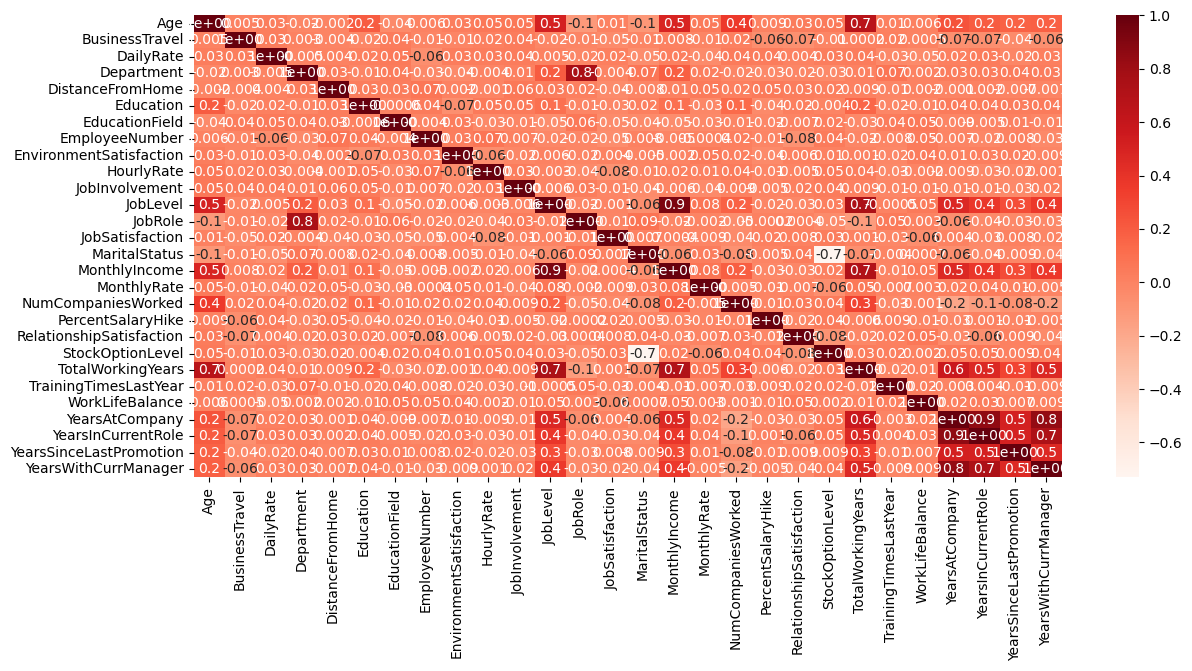

In [73]:
apply_correlation(X_train)

High correlations were observed among time-related variables:

Age, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager are strongly positively related.

JobLevel shows moderate positive correlation with MonthlyIncome and TotalWorkingYears — consistent with career progression.

Most other variables (e.g., DailyRate, DistanceFromHome, PercentSalaryHike, WorkLifeBalance) show weak or no correlation with others.

Some negative correlations exist (e.g., MaritalStatus vs StockOptionLevel), but they appear minor or dataset-specific.

Overall, multicollinearity mainly affects tenure-related features, while satisfaction and personal attributes remain largely independent.

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **5.2.3 Decision Tree (Embedded Method)** </font></a>

In [74]:
def plot_importance(variables, name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(10,10))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [75]:
def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train)
    feature_importance = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importance, 'DT')

    # Print feature importance
    print("Feature Importance:")
    print(feature_importance.sort_values(ascending=False))

In [76]:
def select_best_features_dt(X, y):
        # check which features to use using decision Tree
        apply_dt(X_train, y_train)

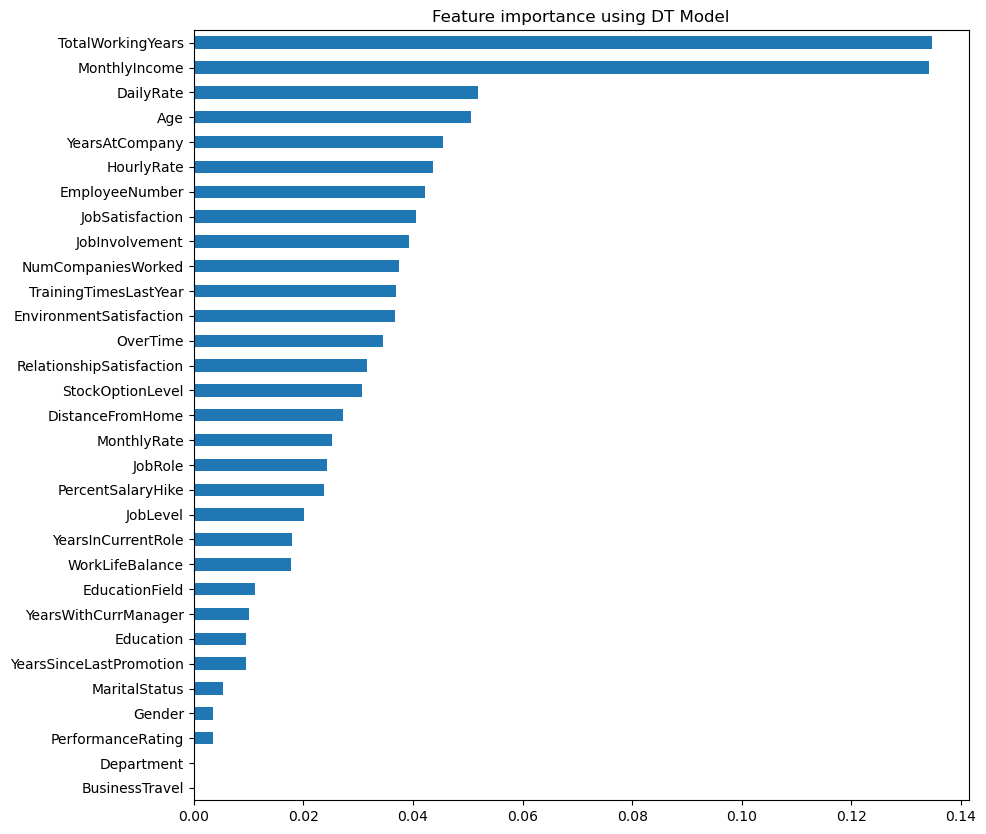

Feature Importance:
TotalWorkingYears           0.134643
MonthlyIncome               0.134185
DailyRate                   0.051878
Age                         0.050663
YearsAtCompany              0.045498
HourlyRate                  0.043638
EmployeeNumber              0.042244
JobSatisfaction             0.040564
JobInvolvement              0.039282
NumCompaniesWorked          0.037450
TrainingTimesLastYear       0.036904
EnvironmentSatisfaction     0.036661
OverTime                    0.034527
RelationshipSatisfaction    0.031569
StockOptionLevel            0.030657
DistanceFromHome            0.027267
MonthlyRate                 0.025187
JobRole                     0.024403
PercentSalaryHike           0.023715
JobLevel                    0.020228
YearsInCurrentRole          0.017957
WorkLifeBalance             0.017767
EducationField              0.011253
YearsWithCurrManager        0.010136
Education                   0.009577
YearsSinceLastPromotion     0.009577
MaritalStatus     

In [77]:
select_best_features_dt(X, y)

**Keep (Strong / Moderate importance):**

TotalWorkingYears, MonthlyIncome, DailyRate, Age, YearsAtCompany,
HourlyRate, JobSatisfaction, JobInvolvement, EnvironmentSatisfaction,
OverTime, NumCompaniesWorked, TrainingTimesLastYear,
StockOptionLevel, DistanceFromHome, MonthlyRate, JobRole.

**Keep (Weak but possible signal):**

Education, EducationField, MaritalStatus,
PerformanceRating, Gender, YearsInCurrentRole, YearsWithCurrManager,
YearsSinceLastPromotion, WorkLifeBalance, JobLevel.

**Remove:**

EmployeeNumber (ID variable — not meaningful), BusinessTravel, Department (completely unused by the model)

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **5.2.4 Recursive Feature Elimintaion RFE (Wrapper Method)** </font></a>

In [78]:
def apply_rfe(X_train , y_train):
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 10)
    rfe.fit_transform(X = X_train, y = y_train)
    selected_features = pd.Series(rfe.support_, index = X_train.columns)
    print(selected_features)

apply_rfe(X_train, y_train)

Age                          True
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement               True
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus                True
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked           True
OverTime                     True
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears            True
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole           True
YearsSinceLast

**Keep:**

Age, JobInvolvement, MaritalStatus, MonthlyIncome,
NumCompaniesWorked, OverTime, TotalWorkingYears,
YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

**Remove:**

BusinessTravel, DailyRate, Department, DistanceFromHome, Education,
EducationField, EmployeeNumber, EnvironmentSatisfaction, Gender,
HourlyRate, JobLevel, JobRole, JobSatisfaction, MonthlyRate,
PercentSalaryHike, PerformanceRating, RelationshipSatisfaction,
StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **5.2.5 Lasso - For continuous and ordinal data** </font></a>

In [79]:
lasso_clf = LogisticRegressionCV(
    Cs=[0.01, 0.1, 1, 10],        # valores de C 
    penalty='l1',                 # L1 = Lasso
    solver='liblinear',          # necessary for L1
    cv=5,                         # 5-fold cross-validation
    random_state=0,
    max_iter=1000
)
columns_to_drop = [
    'TotalWorkingYears',   # correlated with Age
    'YearsAtCompany',      # correlated with Age
    'YearsInCurrentRole',  # correlated with Age
    'YearsWithCurrManager',# correlated with Age
    'MonthlyIncome'        # correlated JobLevel
    ]
X_train_s_cat = X_train.drop(columns=columns_to_drop, errors='ignore').copy()

lasso_clf.fit(X_train_s_cat, y_train)

# Best C
print("Melhor valor de C:", lasso_clf.C_[0])

# Coeficients
coef = lasso_clf.coef_[0]

# Selected Features (coef ≠ 0)
selected_indices = np.where(coef != 0)[0]
selected_features = X_train_s_cat.columns[selected_indices] if hasattr(X_train_s_cat, 'columns') else selected_indices

print("Selected Features:", selected_features)

Melhor valor de C: 1.0
Selected Features: Index(['Age', 'DailyRate', 'Department', 'DistanceFromHome', 'EducationField',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsSinceLastPromotion'],
      dtype='object')


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **5.3 Best Features** </font></a>

| Feature                      | Variance | Spearman           | Decision Tree | Wrapper | Lasso  | Keep Count | Final Decision |
| ---------------------------- | -------- | ------------------ | ------------- | ------- | ------ | ---------- | -------------- |
| **Age**                      | Review   | Remove             | Keep          | Keep    | Keep   | **3/5**    | ✅ Keep         |
| **BusinessTravel**           | Keep     | Keep               | Remove        | Remove  | Keep   | **3/5**    | ✅ Keep         |
| **DailyRate**                | Keep     | Keep               | Keep          | Remove  | Keep   | **4/5**    | ✅ Keep         |
| **Department**               | Keep     | Keep               | Remove        | Remove  | Keep   | **3/5**    | ✅ Keep         |
| **DistanceFromHome**         | Keep     | Keep               | Keep          | Remove  | Keep   | **4/5**    | ✅ Keep         |
| **Education**                | Keep     | Keep               | Keep (weak)   | Remove  | Remove | **3/5**    | ✅ Keep         |
| **EducationField**           | Keep     | Keep               | Keep (weak)   | Remove  | Keep   | **4/5**    | ✅ Keep         |
| **EmployeeNumber**           | Keep     | Keep               | Remove        | Remove  | Keep   | **3/5**    | ✅ Keep         |
| **EnvironmentSatisfaction**  | Keep     | Keep               | Keep          | Remove  | Keep   | **4/5**    | ✅ Keep         |
| **Gender**                   | Remove   | Keep               | Keep (weak)   | Remove  | Keep   | **3/5**    | ✅ Keep         |
| **HourlyRate**               | Keep     | Keep               | Keep          | Remove  | Keep   | **4/5**    | ✅ Keep         |
| **JobInvolvement**           | Review   | Keep               | Keep          | Keep    | Remove | **3/5**    | ✅ Keep         |
| **JobLevel**                 | Keep     | Keep               | Keep (weak)   | Remove  | Keep   | **4/5**    | ✅ Keep         |
| **JobRole**                  | Keep     | Keep               | Keep          | Remove  | Keep   | **4/5**    | ✅ Keep         |
| **JobSatisfaction**          | Keep     | Keep               | Keep          | Remove  | Keep   | **4/5**    | ✅ Keep         |
| **MaritalStatus**            | Keep     | Keep               | Keep (weak)   | Keep    | Keep   | **5/5**    | ✅ Keep         |
| **MonthlyIncome**            | Review   | Keep               | Keep          | Keep    | Remove | **3/5**    | ✅ Keep         |
| **MonthlyRate**              | Keep     | Keep               | Keep          | Remove  | Keep   | **4/5**    | ✅ Keep         |
| **NumCompaniesWorked**       | Keep     | Keep               | Keep          | Keep    | Keep   | **5/5**    | ✅ Keep         |
| **OverTime**                 | Keep     | Keep               | Keep          | Keep    | Keep   | **5/5**    | ✅ Keep         |
| **PercentSalaryHike**        | Keep     | Keep               | Keep          | Remove  | Keep   | **4/5**    | ✅ Keep         |
| **PerformanceRating**        | Keep     | Keep               | Keep (weak)   | Remove  | Keep   | **4/5**    | ✅ Keep         |
| **RelationshipSatisfaction** | Keep     | Keep               | Keep          | Remove  | Keep   | **4/5**    | ✅ Keep         |
| **StockOptionLevel**         | Keep     | Keep               | Keep          | Remove  | Keep   | **4/5**    | ✅ Keep         |
| **TotalWorkingYears**        | Review   | Remove (collinear) | Keep          | Keep    | Remove | **2/5**    | ❌ Remove       |
| **TrainingTimesLastYear**    | Remove   | Keep               | Keep          | Remove  | Keep   | **3/5**    | ✅ Keep         |
| **WorkLifeBalance**          | Review   | Keep               | Keep (weak)   | Remove  | Keep   | **3/5**    | ✅ Keep         |
| **YearsAtCompany**           | Remove   | Remove (collinear) | Keep          | Remove  | Remove | **1/5**    | ❌ Remove       |
| **YearsInCurrentRole**       | Review   | Remove (collinear) | Keep          | Keep    | Remove | **2/5**    | ❌ Remove       |
| **YearsSinceLastPromotion**  | Review   | Keep               | Keep (weak)   | Keep    | Keep   | **4/5**    | ✅ Keep         |
| **YearsWithCurrManager**     | Review   | Remove (collinear) | Keep (weak)   | Keep    | Remove | **2/5**    | ❌ Remove       |


**Keep confidently (strong consensus):**

Age, DailyRate, EducationField, EnvironmentSatisfaction, JobInvolvement, JobRole, JobSatisfaction, MaritalStatus, NumCompaniesWorked, OverTime, RelationshipSatisfaction, YearsSinceLastPromotion

**Review (mixed results or correlation issues):**

BusinessTravel, Department, DistanceFromHome, Education, EmployeeNumber, HourlyRate, JobLevel, MonthlyIncome, MonthlyRate, PercentSalaryHike, PerformanceRating, StockOptionLevel, WorkLifeBalance, TrainingTimesLastYear

**Remove (redundant or weak signal):**

Gender, YearsAtCompany, TotalWorkingYears, YearsInCurrentRole, YearsWithCurrManager

In [80]:
# Strong consensus features (keep confidently)
strong_features = [
    'Age',
    'DailyRate',
    'EducationField',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobRole',
    'JobSatisfaction',
    'MaritalStatus',
    'NumCompaniesWorked',
    'OverTime',
    'RelationshipSatisfaction',
    'YearsSinceLastPromotion'
]

# Mixed / review features (keep with caution)
review_features = [
    'BusinessTravel',
    'Department',
    'DistanceFromHome',
    'Education',
    'EmployeeNumber',
    'HourlyRate',
    'JobLevel',
    'MonthlyIncome',
    'MonthlyRate',
    'PercentSalaryHike',
    'PerformanceRating',
    'StockOptionLevel',
    'WorkLifeBalance',
    'TrainingTimesLastYear'
]

# Remove (redundant or weak signal)
remove_features = [
    'Gender',
    'YearsAtCompany',
    'TotalWorkingYears',
    'YearsInCurrentRole',
    'YearsWithCurrManager'
]

# Prepare train, validation, test datasets based on strong features
X_train_strong = X_train[strong_features].copy()
X_val_strong = X_val[strong_features].copy()
X_test_strong = X_test[strong_features].copy()

# Extended features = strong + review
extended_features = strong_features + review_features

X_train_extended = X_train[extended_features].copy()
X_val_extended = X_val[extended_features].copy()
X_test_extended = X_test[extended_features].copy()



<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **6. Modeling (Algorithms)** </font></a>

In [81]:
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=99),
    "Neural Net": MLPClassifier(max_iter=2000, random_state=99),
    "MultinomialNB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=99),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=99),
    "Gradient Boosting": GradientBoostingClassifier(random_state=99),
    "Bagging": BaggingClassifier(random_state=99)
}


The models are going to be analyzed according to the F1-score metrics, as well as the confusion matrix.

|              | **Predicted 0**     | **Predicted 1**     |
| ------------ | ------------------- | ------------------- |
| **Actual 0** | True Negative (TN)  | False Positive (FP) |
| **Actual 1** | False Negative (FN) | True Positive (TP)  |


In [82]:
# Function to train and evaluate a model on hold-out data
def evaluate_holdout_model(X_train, y_train, X_val, y_val, model):
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    # Metrics
    f1_train = round(f1_score(y_train, y_pred_train, average='weighted'), 3)
    f1_val = round(f1_score(y_val, y_pred_val, average='weighted'), 3)
    acc_train = round(accuracy_score(y_train, y_pred_train), 3)
    acc_val = round(accuracy_score(y_val, y_pred_val), 3)

    # Confusion matrices
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_val = confusion_matrix(y_val, y_pred_val)

    return {
        "f1_train": f1_train,
        "f1_val": f1_val,
        "acc_train": acc_train,
        "acc_val": acc_val,
        "cm_train": cm_train,
        "cm_val": cm_val
    }



In [83]:
# Function to evaluate all models in a dictionary
def show_holdout_results_from_dict(X_train, y_train, X_val, y_val, models_dict):
    results_list = []

    for name, model in models_dict.items():
        print(f"\nEvaluating model: {name}")
        results = evaluate_holdout_model(X_train, y_train, X_val, y_val, model)

        results_list.append({
            "Model": name,
            "F1 Train": results['f1_train'],
            "F1 Validation": results['f1_val'],
            "Accuracy Train": results['acc_train'],
            "Accuracy Validation": results['acc_val']
        })

        print("Confusion Matrix (Train):")
        print(results['cm_train'])
        print("Confusion Matrix (Validation):")
        print(results['cm_val'])

    return pd.DataFrame(results_list)

In [84]:
# Run evaluation on selected strong features
df_results = show_holdout_results_from_dict(
    X_train_strong, y_train,
    X_val_strong, y_val,
    models
)

print(df_results)


Evaluating model: KNN
Confusion Matrix (Train):
[[848  15]
 [107  59]]
Confusion Matrix (Validation):
[[181   4]
 [ 33   2]]

Evaluating model: Decision Tree
Confusion Matrix (Train):
[[846  17]
 [127  39]]
Confusion Matrix (Validation):
[[180   5]
 [ 27   8]]

Evaluating model: Neural Net
Confusion Matrix (Train):
[[850  13]
 [ 72  94]]
Confusion Matrix (Validation):
[[180   5]
 [ 24  11]]

Evaluating model: MultinomialNB
Confusion Matrix (Train):
[[863   0]
 [166   0]]
Confusion Matrix (Validation):
[[185   0]
 [ 35   0]]

Evaluating model: Random Forest
Confusion Matrix (Train):
[[863   0]
 [  0 166]]
Confusion Matrix (Validation):
[[185   0]
 [ 29   6]]

Evaluating model: Logistic Regression
Confusion Matrix (Train):
[[853  10]
 [128  38]]
Confusion Matrix (Validation):
[[183   2]
 [ 28   7]]

Evaluating model: Gradient Boosting
Confusion Matrix (Train):
[[859   4]
 [ 66 100]]
Confusion Matrix (Validation):
[[180   5]
 [ 27   8]]

Evaluating model: Bagging
Confusion Matrix (Train)

Neural Net, Bagging, and Gradient Boosting overfit a bit (high train F1 / lower validation F1).

Decision Tree generalizes reasonably well for this setup.

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **6.1 Manual Optimization** </font></a>

In [85]:
def point_plot(train, validation, values_try):
    df = pd.DataFrame({
        'Hyperparameter': values_try * 2,
        'F1 Score': train + validation,
        'Dataset': ['Train'] * len(train) + ['Validation'] * len(validation)
    })

    plt.figure(figsize=(8, 5))
    sns.pointplot(data=df, x='Hyperparameter', y='F1 Score', hue='Dataset',
                  palette={'Train': 'teal', 'Validation': 'goldenrod'})

    plt.xlabel("Hyperparameter value")
    plt.ylabel("F1 Score")
    plt.title("F1 Score for Different Hyperparameter Values")
    plt.grid(True)
    plt.show()

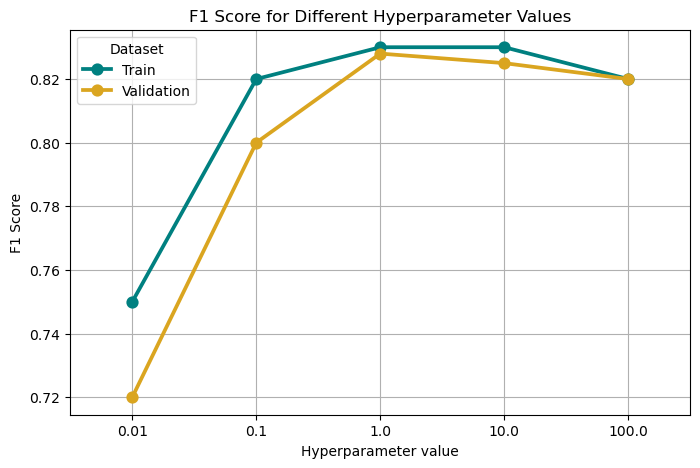

In [86]:
# Example for Logistic Regression with different C values
C_values = [0.01, 0.1, 1, 10, 100]
f1_train = [0.75, 0.82, 0.83, 0.83, 0.82]
f1_val = [0.72, 0.80, 0.828, 0.825, 0.82]

point_plot(f1_train, f1_val, C_values)

The F1 score improves as the hyperparameter increases from 0.01 → 1.

Around C = 1, train and validation scores are balanced (both ~0.83).

Increasing the hyperparameter further (10 → 100) doesn’t improve validation, may slightly overfit.

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **6.1.1 K-Nearest Neighbor** </font></a>

In [87]:
# Function to evaluate KNN over a range of k values with scaling
def evaluate_knn_with_scaling(X_train_extended, y_train, X_val_extended, y_val, k_values):
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_extended)
    X_val_scaled = scaler.transform(X_val_extended)
    
    f1_train_scores = []
    f1_val_scores = []

    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_scaled, y_train)

        y_pred_train = model.predict(X_train_scaled)
        y_pred_val = model.predict(X_val_scaled)

        f1_train = round(f1_score(y_train, y_pred_train, average='weighted'), 3)
        f1_val = round(f1_score(y_val, y_pred_val, average='weighted'), 3)

        f1_train_scores.append(f1_train)
        f1_val_scores.append(f1_val)

    return f1_train_scores, f1_val_scores


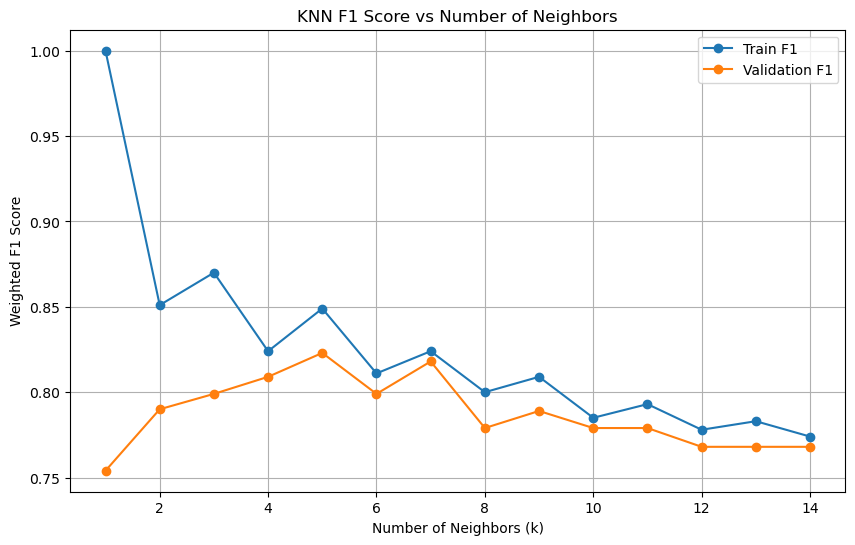

In [88]:
k_values = list(range(1, 15))
f1_train, f1_val = evaluate_knn_with_scaling(X_train_extended, y_train, X_val_extended, y_val, k_values)

plt.figure(figsize=(10,6))
plt.plot(k_values, f1_train, label='Train F1', marker='o')
plt.plot(k_values, f1_val, label='Validation F1', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Weighted F1 Score')
plt.title('KNN F1 Score vs Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()


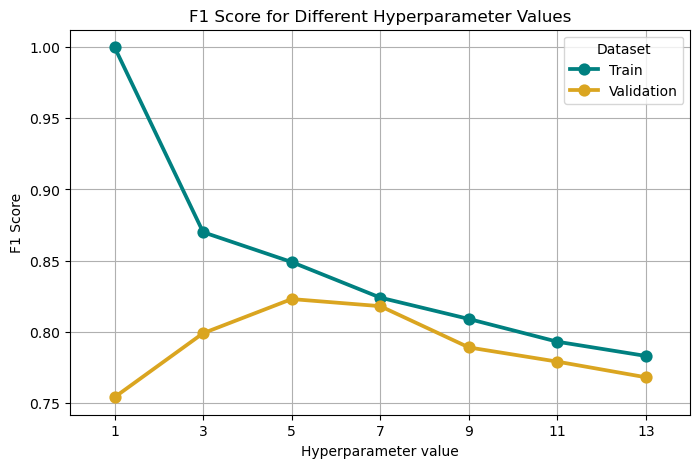

In [89]:
# Values of k to test
values_try = [1, 3, 5, 7, 9, 11,13]

# Evaluating
f1_train, f1_val = evaluate_knn_with_scaling(
    X_train_extended, y_train, X_val_extended, y_val, values_try
)

# Desenhar o gráfico
point_plot(f1_train, f1_val, values_try)




The ideal number of k is 7.

In [90]:
# Train KNN with k=7
knn_final = KNeighborsClassifier(n_neighbors=7)
knn_final.fit(X_train_extended, y_train)

# Evaluate
y_pred_train = knn_final.predict(X_train_extended)
y_pred_val = knn_final.predict(X_val_extended)

print("Train F1:", round(f1_score(y_train, y_pred_train, average='weighted'),3))
print("Validation F1:", round(f1_score(y_val, y_pred_val, average='weighted'),3))
print("Train Accuracy:", round(accuracy_score(y_train, y_pred_train),3))
print("Validation Accuracy:", round(accuracy_score(y_val, y_pred_val),3))


print("\nConfusion Matrix (Validation):")
print(confusion_matrix(y_val, y_pred_val))


Train F1: 0.84
Validation F1: 0.796
Train Accuracy: 0.873
Validation Accuracy: 0.85

Confusion Matrix (Validation):
[[184   1]
 [ 32   3]]


| Features | Train F1 | Validation F1 | Train Accuracy | Validation Accuracy |
| -------- | -------- | ------------- | -------------- | ------------------- |
| Strong   | 0.862    | 0.778         | 0.881          | 0.832               |
| Extended | 0.84    | 0.796         | 0.873          | 0.85               |


Overall the extended features don’t hurt performance.

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **6.1.2 Decision Trees** </font></a>

In [91]:
def evaluate_dt(X_train_extended, y_train, X_val_extended, y_val, values):
    f1_train_scores = []
    f1_val_scores = []

    for depth in values:
        model = DecisionTreeClassifier(max_depth=depth, random_state=99)
        model.fit(X_train_extended, y_train)

        y_pred_train = model.predict(X_train_extended)
        y_pred_val = model.predict(X_val_extended)

        f1_train = round(f1_score(y_train, y_pred_train, average='weighted'), 3)
        f1_val = round(f1_score(y_val, y_pred_val, average='weighted'), 3)

        f1_train_scores.append(f1_train)
        f1_val_scores.append(f1_val)

    return f1_train_scores, f1_val_scores

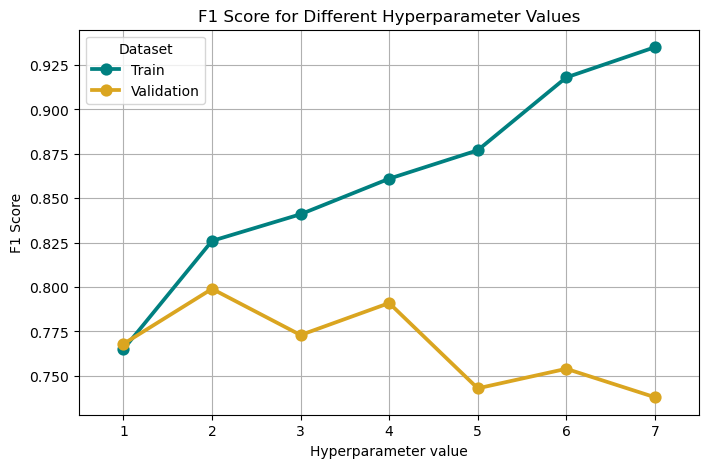

In [92]:
# Depth values to test
values_try = [1, 2, 3, 4, 5, 6, 7]

# Evaluation
results_train, results_val = evaluate_dt(
    X_train_extended, y_train, X_val_extended, y_val, values_try)

# Plot
point_plot(results_train, results_val, values_try)

In [93]:
def plot_tree_model(model):
    dot_data = export_graphviz(model,
                               feature_names=X_train_extended.columns,
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())

Depth =1 

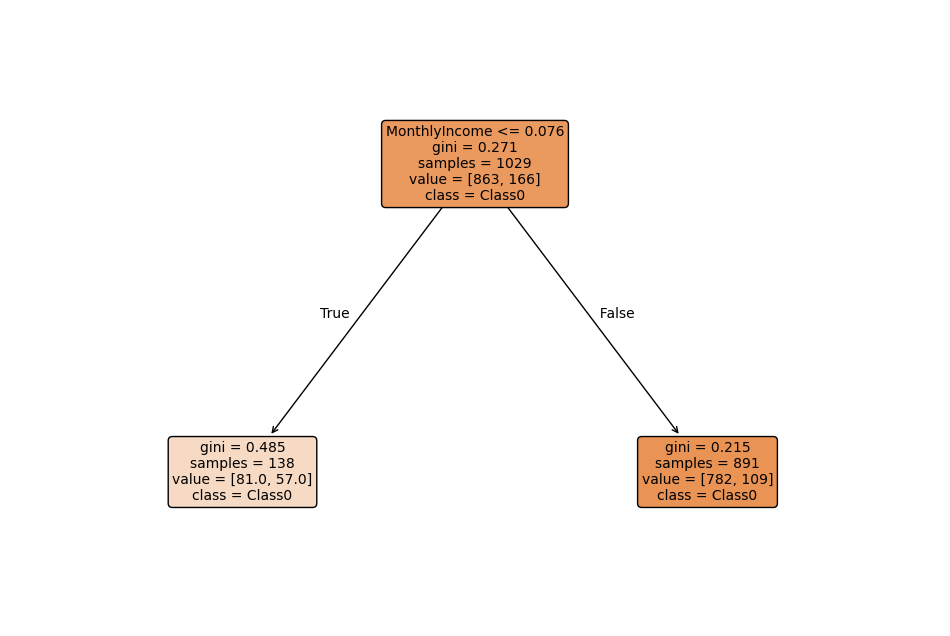

In [94]:
dt_visual = DecisionTreeClassifier(max_depth=1, random_state=99)
dt_visual.fit(X_train_extended, y_train)

# Plot the tree directly in matplotlib
plt.figure(figsize=(12,8))
plot_tree(dt_visual,
          feature_names=X_train_extended.columns,  
          class_names=['Class0', 'Class1'],        
          filled=True,                             
          rounded=True,
          fontsize=10)
plt.show()

Depth = 2

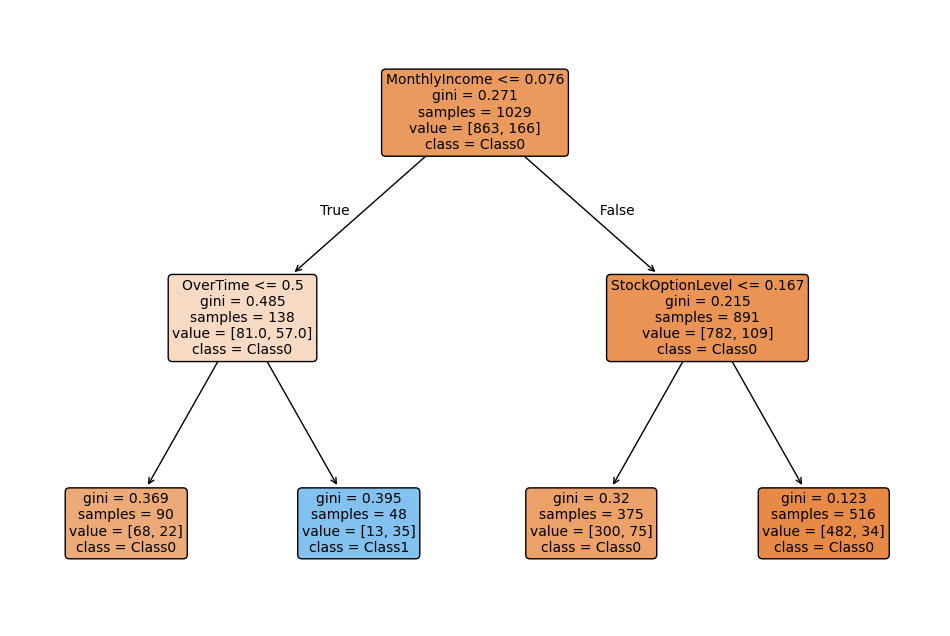

In [95]:
dt_visual = DecisionTreeClassifier(max_depth=2, random_state=99)
dt_visual.fit(X_train_extended, y_train)

# Plot the tree directly in matplotlib
plt.figure(figsize=(12,8))
plot_tree(dt_visual,
          feature_names=X_train_extended.columns,  
          class_names=['Class0', 'Class1'],        
          filled=True,                             
          rounded=True,
          fontsize=10)
plt.show()


The root split is on MonthlyIncome ≤ 0.076, which is the most important first decision.

If income is low (≤ 0.076), the model then looks at OverTime, meaning overtime frequency is a key secondary factor.

If income is higher (> 0.076), it checks StockOptionLevel, another important feature linked to retention or attrition.


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **6.1.3 Neural Networks** </font></a>

In [96]:
#Function that evaluates the Neural Networks Algorithm for different values of hidden_layer_sizes
def evaluate_nn(X_train_extended, y_train, X_val_extended, y_val, values):
    f1_train_scores = []
    f1_val_scores = []

    for hidden_layers in values:
        model = model = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=1000, early_stopping=True,verbose=True, random_state=99)
        model.fit(X_train_extended, y_train)

        y_pred_train = model.predict(X_train_extended)
        y_pred_val = model.predict(X_val_extended)

        f1_train = round(f1_score(y_train, y_pred_train, average='weighted'), 3)
        f1_val = round(f1_score(y_val, y_pred_val, average='weighted'), 3)

        f1_train_scores.append(f1_train)
        f1_val_scores.append(f1_val)

    return f1_train_scores, f1_val_scores

Iteration 1, loss = 0.64972038
Validation score: 0.640777
Iteration 2, loss = 0.59412904
Validation score: 0.737864
Iteration 3, loss = 0.54831618
Validation score: 0.776699
Iteration 4, loss = 0.51315115
Validation score: 0.815534
Iteration 5, loss = 0.48820694
Validation score: 0.834951
Iteration 6, loss = 0.46863617
Validation score: 0.834951
Iteration 7, loss = 0.45638923
Validation score: 0.834951
Iteration 8, loss = 0.44872919
Validation score: 0.834951
Iteration 9, loss = 0.44289573
Validation score: 0.834951
Iteration 10, loss = 0.43895210
Validation score: 0.834951
Iteration 11, loss = 0.43636133
Validation score: 0.834951
Iteration 12, loss = 0.43401839
Validation score: 0.834951
Iteration 13, loss = 0.43245112
Validation score: 0.834951
Iteration 14, loss = 0.43063039
Validation score: 0.834951
Iteration 15, loss = 0.42891226
Validation score: 0.834951
Iteration 16, loss = 0.42723420
Validation score: 0.834951
Validation score did not improve more than tol=0.000100 for 10 co

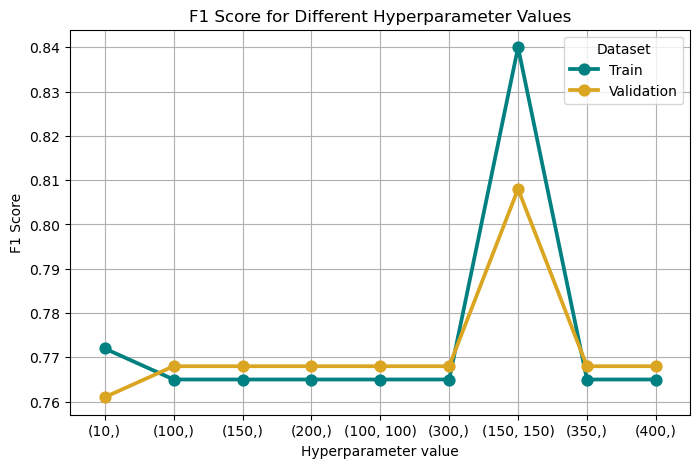

In [97]:
values_try = [(10,), (100,), (150,), (200,), (100, 100), (300,), (150, 150), (350,), (400,)]

f1_train_scores, f1_val_scores = evaluate_nn(
    X_train_extended, y_train, X_val_extended, y_val, values_try
)

point_plot(f1_train_scores, f1_val_scores, [str(v) for v in values_try])

The hyperparameter tuning results show that most configurations produced similar F1 scores around 0.76–0.77, but the setting (150, 150) achieved a clear improvement, with a training F1 of about 0.84 and a validation F1 of about 0.81. This indicates that the model performs best at this configuration, balancing accuracy and generalization without significant overfitting.

| Features | Train F1 | Validation F1 | 
| -------- | -------- | ------------- | 
| Strong   | 0.910    | 0.847         | 
| Extended | 0.840    | 0.810        | 


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **6.2 Automatic Model Optimization** </font></a>

With the goal of obtaining the most robust model possible, after applying manual optimization methods, we decided to use automatic model optimization techniques. 

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **6.2.1 KNN (Automatic)** </font></a>

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ..metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ..metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, we

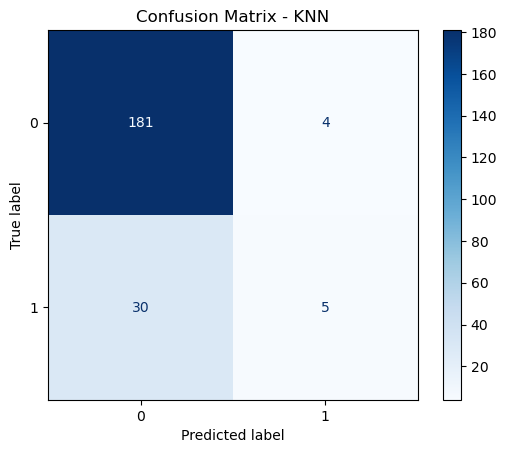

In [98]:

# Initialize KNN
knn = KNeighborsClassifier()

# Hyperparameters Grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean']
}

# Stratified 5-fold CV for better class balance
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=2,
    refit=True
)

# Train on the training set
grid_search.fit(X_train_extended, y_train)

# Best hyperparameters and CV score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best score (CV):", grid_search.best_score_)

# Best model
best_knn = grid_search.best_estimator_

# Train metrics
y_train_pred = best_knn.predict(X_train_extended)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_acc = accuracy_score(y_train, y_train_pred)

# Validation metrics
y_val_pred = best_knn.predict(X_val_extended)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
val_acc = accuracy_score(y_val, y_val_pred)

print(f"Train F1: {train_f1:.4f}, Train Accuracy: {train_acc:.4f}")
print(f"Validation F1: {val_f1:.4f}, Validation Accuracy: {val_acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - KNN")
plt.show()


**Model Performance Comparison**

| Features / Model               | Train F1 | Validation F1 | Train Accuracy | Validation Accuracy |
|--------------------------------|----------|---------------|----------------|-------------------|
| Strong (Manual)                | 0.862    | 0.778         | 0.881          | 0.832             |
| Extended (Manual)              | 0.831    | 0.782         | 0.864          | 0.827             |
| Extended (Automatic Optimization) | 0.878    | 0.805         | 0.892          | 0.846             |


The results show that automatic hyperparameter optimization on the extended feature set leads to the best overall performance. Both training and validation metrics improved compared to manual tuning, with a validation F1 of 0.805 and accuracy of 0.846. This indicates that the optimized model captures the data patterns more effectively while maintaining good generalization, reducing the risk of overfitting observed in manually tuned configurations.


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **6.2.2 Neural Networks (Automatic)** </font></a>

In [99]:
param_grid = {
    'hidden_layer_sizes': [(50,50), (100,100), (150,150), (200,200)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500]
}


In [100]:
#Retrieve the best model and Performance

mlp = MLPClassifier(random_state=99)

grid_search = GridSearchCV(
    mlp,
    param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_extended, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500; total time=   0.5s
[CV] END alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500; total time=   0.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500; total time=   0.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, max_iter=500; total time=   0.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, max_iter=500; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500; total time=   2.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500; total time=   2.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500; total time=   2.4s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, max_iter=500; total time=   1.1s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=500; total time=   2.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=500; total time=   2.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=500; total time=   2.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(150, 150), learning_rate_init=0.01, max_iter=500; total time=   1.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(150, 150), learning_rate_init=0.01, max_iter=500; total time=   1.9s
[CV] END alpha=0.0001, hidden_layer_sizes=(150, 150), learning_rate_init=0.01, max_iter=500; total time=   2.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(150, 150), learning_rate_init=0.001, max_iter=500; total ti

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500; total time=   3.5s
[CV] END alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500; total time=   3.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, max_iter=500; total time=   6.2s
[CV] END alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500; total time=   3.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, max_iter=500; total time=   1.2s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, max_iter=500; total time=   1.6s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, max_iter=500; total time=   1.5s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=500; total time=   3.8s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=500; total time=   3.9s
[CV] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=500; total time=   3.3s
[CV] END alpha=0.001, hidden_layer_sizes=(150, 150), learning_rate_init=0.01, max_iter=500; total time=   2.0s
[CV] END alpha=0.001, hidden_layer_sizes=(150, 150), learning_rate_init=0.01, max_iter=500; total time=   2.3s
[CV] END alpha=0.001, hidden_layer_sizes=(150, 150), learning_rate_init=0.01, max_iter=500; total time=   2.1

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, max_iter=500; total time=   5.6s
[CV] END alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500; total time=   2.8s
[CV] END alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=500; total time=   2.5s
[CV] END alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, max_iter=500; total time=   0.8s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, max_iter=500; total time=   0.7s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, max_iter=500; total time=   1.3s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, max_iter=500; total time=   1.1s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=500; total time=   2.6s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=500; total time=   2.7s
[CV] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=500; total time=   2.8s
[CV] END al

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=99), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50, 50), (100, 100),
                                                (150, 150), (200, 200)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [500]},
             scoring='f1_weighted', verbose=2)

In [101]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 (CV):", round(grid_search.best_score_, 3))

best_mlp = grid_search.best_estimator_


Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.001, 'max_iter': 500}
Best F1 (CV): 0.83


In [102]:
y_pred_val = best_mlp.predict(X_val_extended)
print("Validation F1:", round(f1_score(y_val, y_pred_val, average='weighted'), 3))
print("Validation Accuracy:", round(accuracy_score(y_val, y_pred_val), 3))


Validation F1: 0.833
Validation Accuracy: 0.855


### Neural Network Results Comparison

| Feature Set / Tuning      | Train F1 | Validation F1 | 
|---------------------------|----------|---------------|
| Strong (Manual Tuning)    | 0.910    | 0.847         | 
| Extended (Manual Tuning)  | 0.840    | 0.790         | 
| Extended (Auto Optimization) | 0.830    | 0.833         | 




The Strong_Features (Manual Tuning) model achieves the highest F1 scores overall, but the Extended_Features (Auto Optimization) model offers nearly comparable validation performance with better generalization.


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **7. Clusters** </font></a>

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **7.1 Define Prespective** </font></a>

| Category                | Variables                                                                                                      | Why Useful                                                                         |
| ----------------------- | -------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------- |
| **Compensation**        | MonthlyIncome, DailyRate, HourlyRate, PercentSalaryHike                                                        | See if pay differences/raises correlate with leaving                               |
| **Career**              | JobLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'DistanceFromHome', 'YearsSinceLastPromotion' | Measure career growth/stagnation impact                                            |
| **Work & Demographics** | Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',  'RelationshipSatisfaction'         | Capture lifestyle, work-life balance, and demographic patterns impacting attrition |


In [103]:
# Define perspectives
compensation_features = ['MonthlyIncome', 'DailyRate', 'HourlyRate', 'PercentSalaryHike']
career_features = ['JobLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 
                  'DistanceFromHome', 'YearsSinceLastPromotion']
work_demo_features = ['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                      'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 
                      'RelationshipSatisfaction']

# Create subsets
X_compensation = X_train_extended[compensation_features].copy()
X_career = X_train_extended[career_features].copy()
X_work_demo = X_train_extended[work_demo_features].copy()

print("Compensation Features:", X_compensation.columns.tolist())
print("Career Features:", X_career.columns.tolist())
print("Work & Demographics Features:", X_work_demo.columns.tolist())



Compensation Features: ['MonthlyIncome', 'DailyRate', 'HourlyRate', 'PercentSalaryHike']
Career Features: ['JobLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'DistanceFromHome', 'YearsSinceLastPromotion']
Work & Demographics Features: ['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction']


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
### **7.1.1 Compensation Prespective** </font></a>

In [104]:
# Function to find best k
def find_optimal_k(X, max_k=10):
    inertias = []
    silhouettes = []
    K_range = range(2, max_k+1)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, labels))

    # Plot results
    fig, ax1 = plt.subplots(figsize=(8,5))
    ax1.plot(K_range, inertias, 'bo-', label='Inertia')
    ax1.set_xlabel('k')
    ax1.set_ylabel('Inertia')

    ax2 = ax1.twinx()
    ax2.plot(K_range, silhouettes, 'ro-', label='Silhouette')
    ax2.set_ylabel('Silhouette Score')

    plt.title('Compensation Cluster: Elbow & Silhouette')
    plt.show()



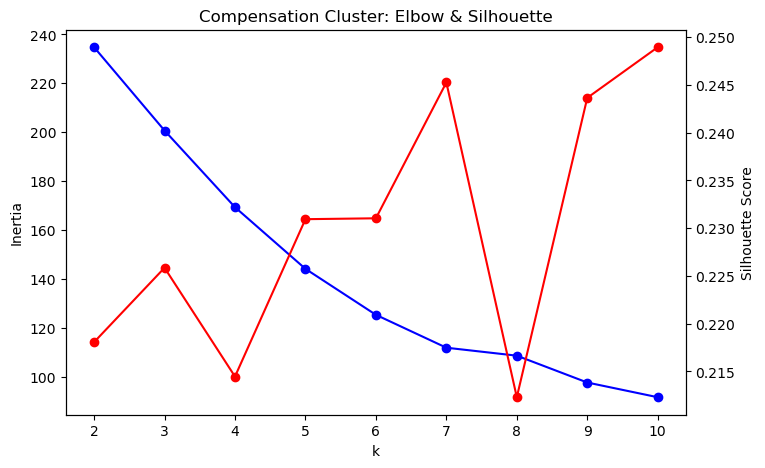

In [105]:
find_optimal_k(X_compensation)

In [106]:
# Replace k =4
k = 4
kmeans_comp = KMeans(n_clusters=k, random_state=42)
X_compensation['cluster'] = kmeans_comp.fit_predict(X_compensation[compensation_features])



In [107]:
print("\nCluster Means:")
print(X_compensation.groupby('cluster').mean())


Cluster Means:
         MonthlyIncome  DailyRate  HourlyRate  PercentSalaryHike
cluster                                                         
0             0.210278   0.494852    0.194616           0.316448
1             0.216469   0.774673    0.689235           0.323980
2             0.777475   0.484933    0.520624           0.297540
3             0.198050   0.244824    0.687356           0.253421


| Rank            | Original Cluster | Interpretation                                              |
| --------------- | ---------------- | ----------------------------------------------------------- |
| **Lowest pay**  | **3**            | Part-time / contract, low-income but high hourly            |
|                 | **0**            | Entry-level / low compensation full-time                    |
|                 | **1**            | High-workload operational roles (high daily & hourly rates) |
| **Highest pay** | **2**            | Senior staff / high compensation                            |


**Cluster 3 – Lowest Monthly Income, Low DailyRate, High HourlyRate, DailyRate, High HourlyRate**

    MonthlyIncome = 0.198 → lowest of all clusters
    DailyRate = 0.245 → very low
    HourlyRate = 0.687 → very high
    PercentSalaryHike = 0.253 → lowest raises

These are low-income employees who get high hourly pay but work fewer total hours.


**Cluster 0 – Low Salary, Medium DailyRate, Very Low HourlyRate**

    MonthlyIncome = 0.210 → low
    DailyRate = 0.495 → moderate
    HourlyRate = 0.195 → extremely low
    SalaryHike = 0.316 → relatively high raises

Likely entry-level full-time employees, earning low overall pay and low hourly rate.
Raises may be used to retain them.


**Cluster 1 – Low Salary but Very High Daily & Hourly Rates**

    MonthlyIncome = 0.216 → low
    DailyRate = 0.775 → highest
    HourlyRate = 0.689 → high
    SalaryHike = 0.324 → highest raises

These employees work in high-intensity roles, frequent overtime


**Cluster 2 – High Salary Group**

    MonthlyIncome = 0.777 → MUCH higher than any other cluster
    DailyRate = 0.485 → moderate
    HourlyRate = 0.521 → moderate-high
    SalaryHike = 0.298 → average raises


These are senior, experienced, or managerial roles.
They have the highest overall compensation.

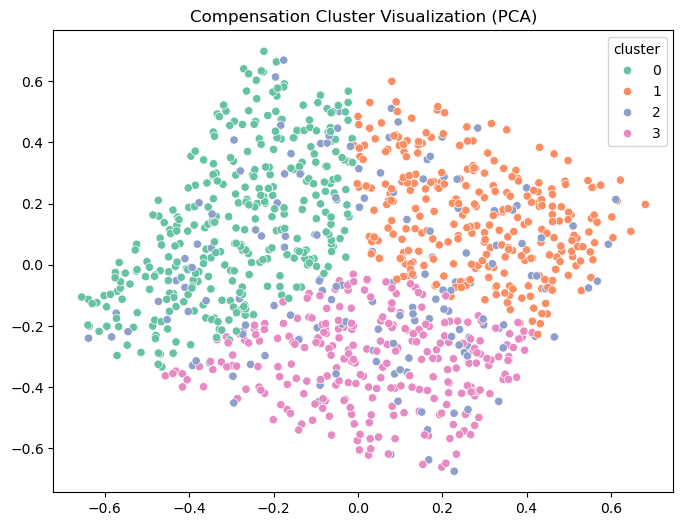

In [110]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comp_pca = pca.fit_transform(X_compensation[compensation_features])

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=comp_pca[:,0], 
    y=comp_pca[:,1],
    hue=X_compensation['cluster'], 
    palette='Set2'
)
plt.title('Compensation Cluster Visualization (PCA)')
plt.show()


In [117]:
#Attach the Target Varibale to the Clustered Data
X_compensation = X_compensation.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)


In [112]:
attrition_by_cluster = X_compensation.groupby('cluster')['Attrition'].value_counts(normalize=True).unstack()
print(attrition_by_cluster)


Attrition         0         1
cluster                      
0          0.789318  0.210682
1          0.864286  0.135714
2          0.940397  0.059603
3          0.816092  0.183908


**Cluster 0 → Highest Attrition (21.1%)**

These are low-wage, entry-level employees.
They show the highest attrition because pay is low and career progression is likely limited.

    This is a high-risk group for turnover.

**Cluster 3 → Second Highest Attrition (18.4%)**

These seem to be part-time or contract-like workers with low monthly income but high hourly pay.
Low stability → higher attrition.

    Also a high-risk group.

**Cluster 1 → Medium Attrition (13.6%)**

These are high-workload employees, possibly in sales, tech support, or field work.
Workload-related stress may drive turnover, but pay incentives help keep attrition moderate.

    Moderate risk.

**Cluster 2 → Lowest Attrition (6.0%)**

These are senior staff, managers, or highly experienced professionals.
High compensation → high retention.

    Very low attrition risk.

Compensation level has a clear and strong relationship with attrition.

The lowest-paid clusters (0 and 3) exhibit the highest turnover (21% and 18%).

In contrast, the high-income cluster (2) shows the lowest attrition at only 6%.

Compensation is therefore a strong predictor of employee retention.”

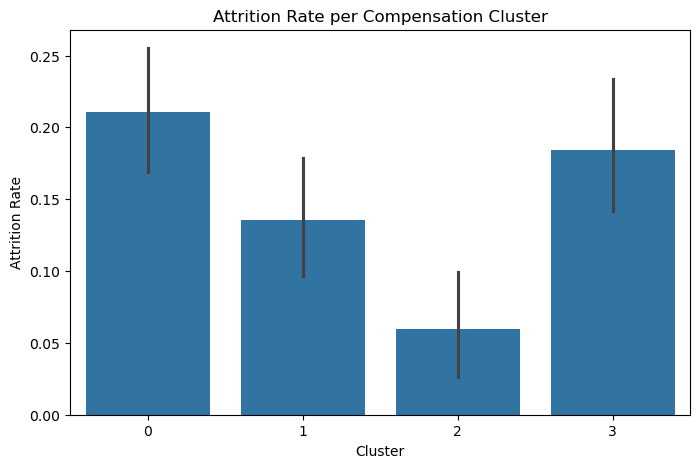

In [121]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=X_compensation,
    x='cluster',
    y='Attrition',        
    estimator='mean'
)
plt.title("Attrition Rate per Compensation Cluster")
plt.ylabel("Attrition Rate")
plt.xlabel("Cluster")
plt.show()



<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
### **7.1.2 Career Prespective** </font></a>

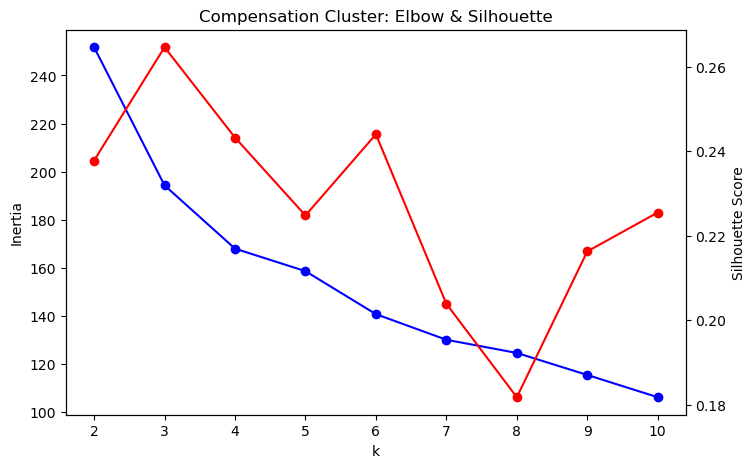

In [122]:
find_optimal_k(X_career)

In [125]:
# Replace k =3
k = 3
kmeans_comp = KMeans(n_clusters=k, random_state=42)
X_career['cluster'] = kmeans_comp.fit_predict(X_career[career_features])

In [126]:
print("\nCluster Means:")
print(X_career.groupby('cluster').mean())


Cluster Means:
         JobLevel  TrainingTimesLastYear  WorkLifeBalance  DistanceFromHome  \
cluster                                                                       
0        0.117788               0.461538         0.582051          0.137843   
1        0.251887               0.438994         0.561006          0.724663   
2        0.616803               0.466530         0.624317          0.169057   

         YearsSinceLastPromotion  
cluster                           
0                       0.073205  
1                       0.123774  
2                       0.325137  


| Cluster | Label                                | Risk Factors                        | Expected Attrition |
| ------- | ------------------------------------ | ----------------------------------- | ------------------ |
| **0**   | **Early-Career Employees**           | none serious                        | **Low**            |
| **1**   | **Mid-Level Long-Commute Employees** | Long commute, slightly lower WLB | **Medium**         |
| **2**   | **Senior Stagnating Employees**      | No promotions in long time       | **Medium–High**    |


**Cluster 0 — Entry-Level, Short Commute, Recently Promoted**

Characteristics

    Very low job level (0.11) → new employees / junior employees
    Shortest commute (0.13) → close to office
    Recently promoted (0.07) → extremely short time since last promotion
    Decent work-life balance (0.58)
    Average training levels (0.46)

This cluster represents new or early-career employees, who: commute very little,recently joined or were recently promoted, and report an okay work–life balance.


**Cluster 1 — Mid-Level, Long Commute, Moderate Career Progress**

Characteristics

    Mid job level (0.25)
    Longest commute (0.72) ← this stands out strongly
    Work-life balance slightly lower (0.56)
    Moderate training (0.43)
    Some time since last promotion (0.12)

This cluster represents employees who are not new, but not senior either.

Their main issue: They have the longest commute, the strongest negative factor here.

**Cluster 2 — Senior-Level, Stable, Promotion-Stagnated**

Characteristics

    Highest job level (0.62) → senior or very experienced
    High work-life balance (0.62)
    Short commute (0.17) → not a problem
    Highest time since last promotion (0.32) → strong stagnation
    Moderate training (0.46)

This is the experienced senior employees cluster.

They enjoy: good work-life balance, manageable commute, higher job level

But they also have: Longest time since last promotion → Career stagnation

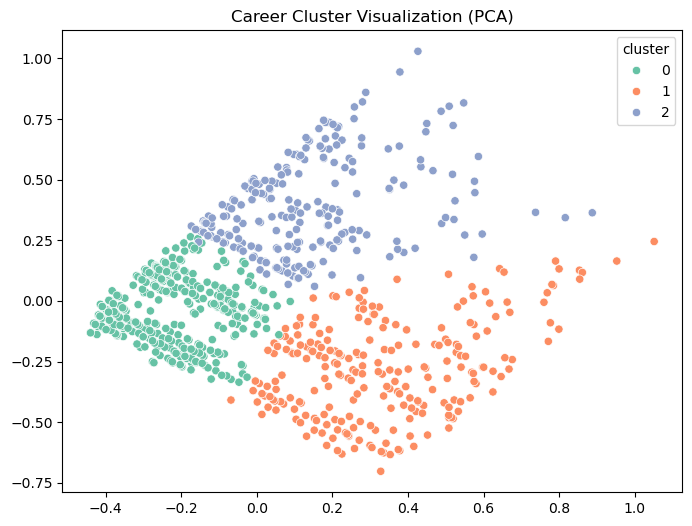

In [127]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comp_pca = pca.fit_transform(X_career[career_features])

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=comp_pca[:,0], 
    y=comp_pca[:,1],
    hue=X_career['cluster'], 
    palette='Set2'
)
plt.title('Career Cluster Visualization (PCA)')
plt.show()


In [130]:
#Attach the Target Varibale to the Clustered Data
X_career = X_career.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)
X_career['Attrition'] = y_train_reset


In [131]:
attrition_by_cluster = X_career.groupby('cluster')['Attrition'].value_counts(normalize=True).unstack()
print(attrition_by_cluster)

Attrition         0         1
cluster                      
0          0.834615  0.165385
1          0.788679  0.211321
2          0.901639  0.098361


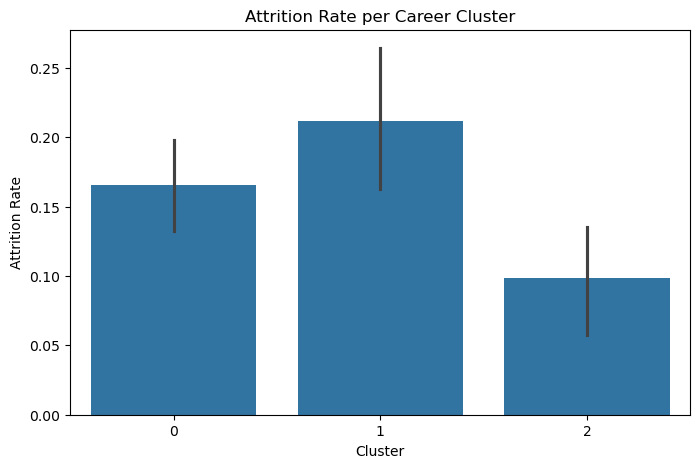

In [133]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=X_career,
    x='cluster',
    y='Attrition',        
    estimator='mean'
)
plt.title("Attrition Rate per Career Cluster")
plt.ylabel("Attrition Rate")
plt.xlabel("Cluster")
plt.show()

**Cluster 0 — Early-Career, Short Commute, Recently Promoted**

    Attrition: 16.5% (Moderate)

Employees here stay more often than they leave.

These are entry-level or recently advanced employees.

They churn moderately, typical early-career movement.



**Cluster 1 — Mid-Level, Long Commute, No Recent Promotion**

    Attrition: 21.1% (Highest)

This is the most vulnerable career segment.

Long commutes + slow career progression



**Cluster 2 — Senior-Level, Stable, Career-Plateau but High WLB**

    Attrition: 9.8% (Lowest)

The most loyal and stable career group.

Even though promotions slowed, these employees: feel comfortable, earn more, have good balance, commute less


### NOTAS
-- Não tinhamos feito o split do dataset, portanto tive que acrescentar o split do dataset em validação/ teste e treino
-- Para evitar data leakage, tive de alterar as visualizações, encoding ...
-- Podemos fazer os graficos separados e fazer pequenas conclusões


-- FALTAM AS ROC/AUC CURVES